# Data Understanding and Preprocessing

## Importing Dataset

Dataset from: https://d2l.udst.edu.qa/d2l/login?sessionExpired=0&target=%2fd2l%2fle%2fcontent%2f136863%2fviewContent%2f3130847%2fView

In [1]:
'''
=========================================================================================
UJIIndoorLoc Dataset:
=========================================================================================
The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint

J. Torres-Sospedra, R. Montoliu, A. Martnez-Us, T. Arnau, and J. Avariento. "UJIIndoorLoc," UCI Machine Learning Repository, 2014. [Online]. Available: https://doi.org/10.24432/C5MS59.

Attribute 001 (WAP001): Intensity value for WAP001. Negative integer values from -104 to 0 and +100 (closer to 0 mean closer) Positive value 100 used if WAP001 was not detected.
....WAP002...WAP003... to WAP00520
Attribute 520 (WAP520): Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
Attribute 521 (LONGITUDE): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
Attribute 522 (LATITUDE): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
Attribute 523 (FLOOR): Altitude in floors inside the building. Integer values from 0 to 4.
Attribute 524 (BUILDINGID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
Attribute 525 (SPACEID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
Attribute 526 (RELATIVEPOSITION): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
Attribute 527 (USERID): User identifier (see below). Categorical integer values. 
Attribute 528 (PHONEID): Android device identifier (see below). Categorical integer values.  
Attribute 529 (TIMESTAMP): UNIX Time when the capture was taken. Integer value. 
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./UJIndoorLoc/trainingData.csv")
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Dataset Exploration

### General exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from collections import Counter

In [3]:
descriptive_stats = df.describe()
descriptive_stats

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [4]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
df[RSSI_columns] = df[RSSI_columns].replace(100, -105) # So the range will be -105 to 0 and the values with 100 will turn into 105

other_columns = ["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", 
                   "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

In [5]:
df[RSSI_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 520 entries, WAP001 to WAP520
dtypes: int64(520)
memory usage: 79.1 MB


In [6]:
df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


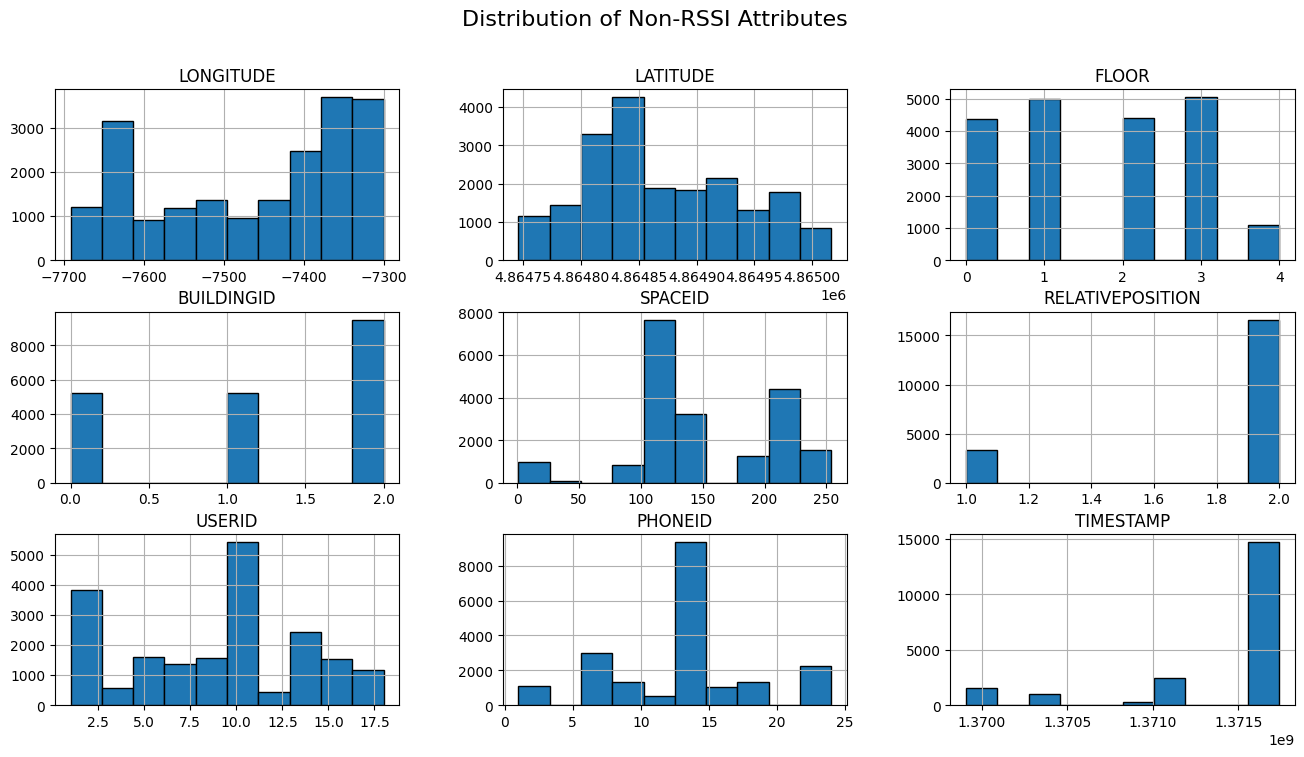

In [7]:
# Histograms for each Non-RSSI attribute
df[other_columns].hist(figsize=(16, 8), edgecolor='black')
plt.suptitle("Distribution of Non-RSSI Attributes", fontsize=16)
plt.show()


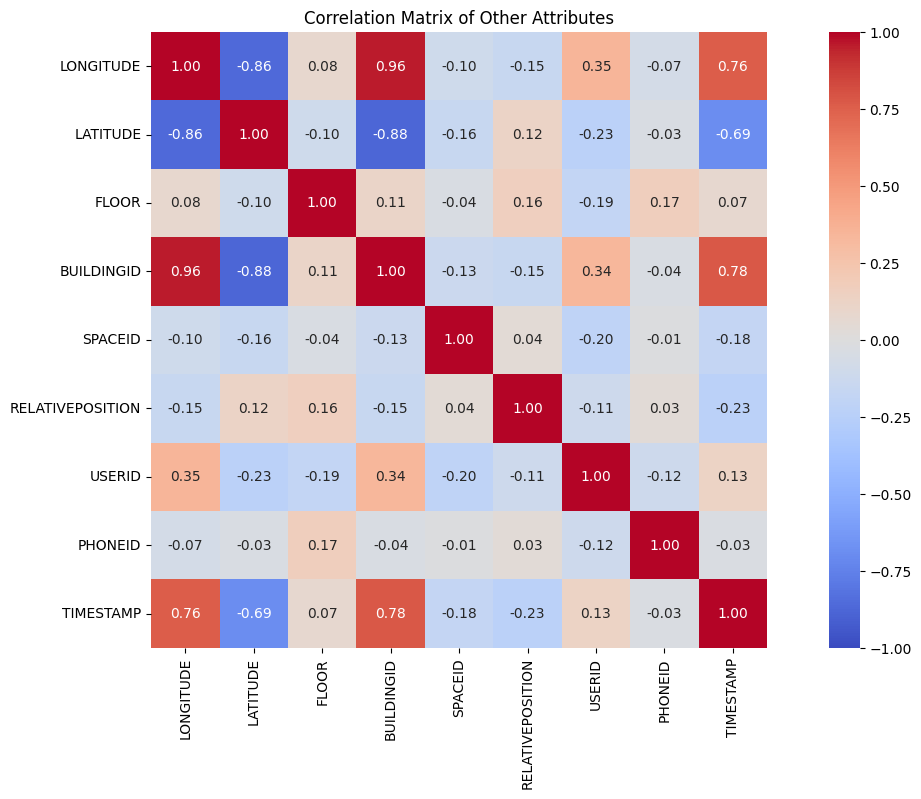

In [8]:
# Correlation matrix 
plt.figure(figsize=(16, 8))
sns.heatmap(df[other_columns].corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0, vmax= 1, vmin=-1, square=True)
plt.title("Correlation Matrix of Other Attributes")
plt.show()


In [9]:
# # Pairplot for FLOOR 
# pairplot1 = sns.pairplot(df[other_columns], hue="FLOOR")
# pairplot1.fig.suptitle("Pairplot of Other Attributes (Colored by FLOOR)")

# # Pairplot for BUILDINGID
# pairplot2 = sns.pairplot(df[other_columns], hue="BUILDINGID")
# pairplot2.fig.suptitle("Pairplot of Other Attributes (Colored by BUILDINGID)")

# plt.show()


### Floor and Buildings

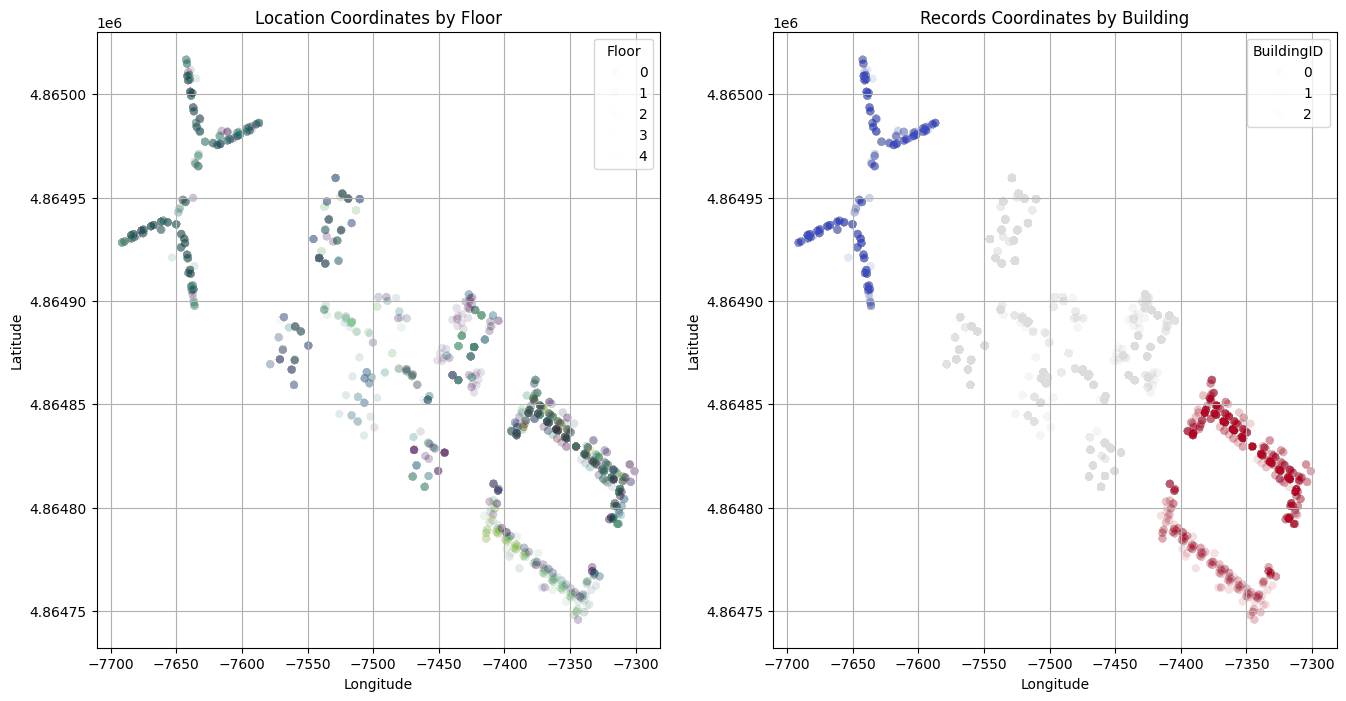

In [10]:
# Scatter plot of Longitude vs Latitude colored by Floor and By building
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["FLOOR"], alpha=0.01, palette="viridis")
plt.title("Location Coordinates by Floor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Floor")
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=df["LONGITUDE"], y=df["LATITUDE"], hue=df["BUILDINGID"], alpha=0.01, palette="coolwarm")
plt.title("Records Coordinates by Building")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="BuildingID")
plt.grid()
plt.show()

In [11]:
unique_floors = sorted(df['FLOOR'].unique())
unique_buildings = sorted(df['BUILDINGID'].unique())

print("unique_floors:", unique_floors)
print("unique_buildings:", unique_buildings)

unique_floors: [0, 1, 2, 3, 4]
unique_buildings: [0, 1, 2]


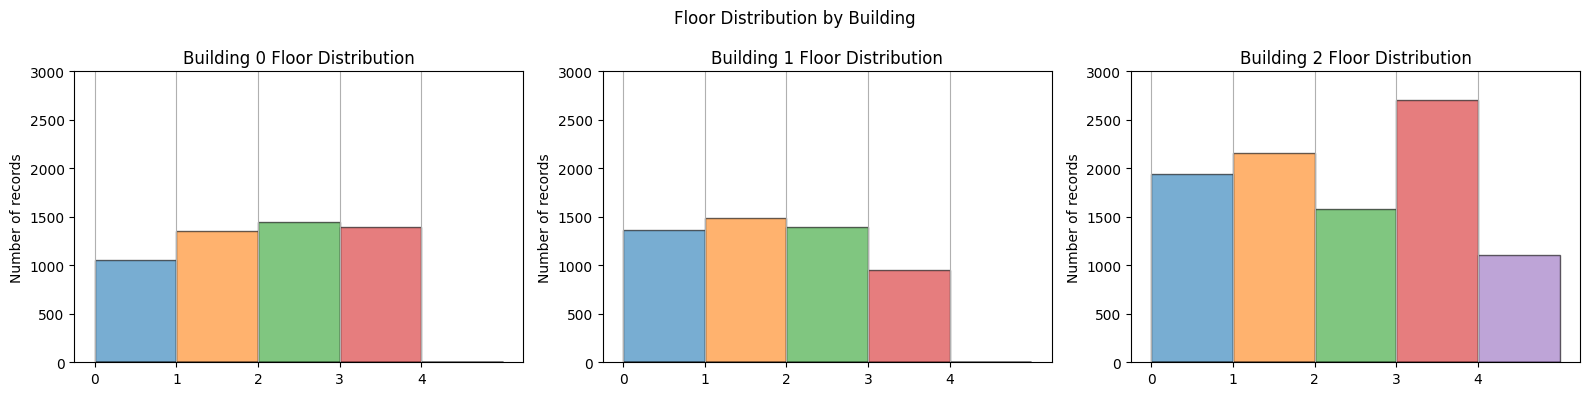

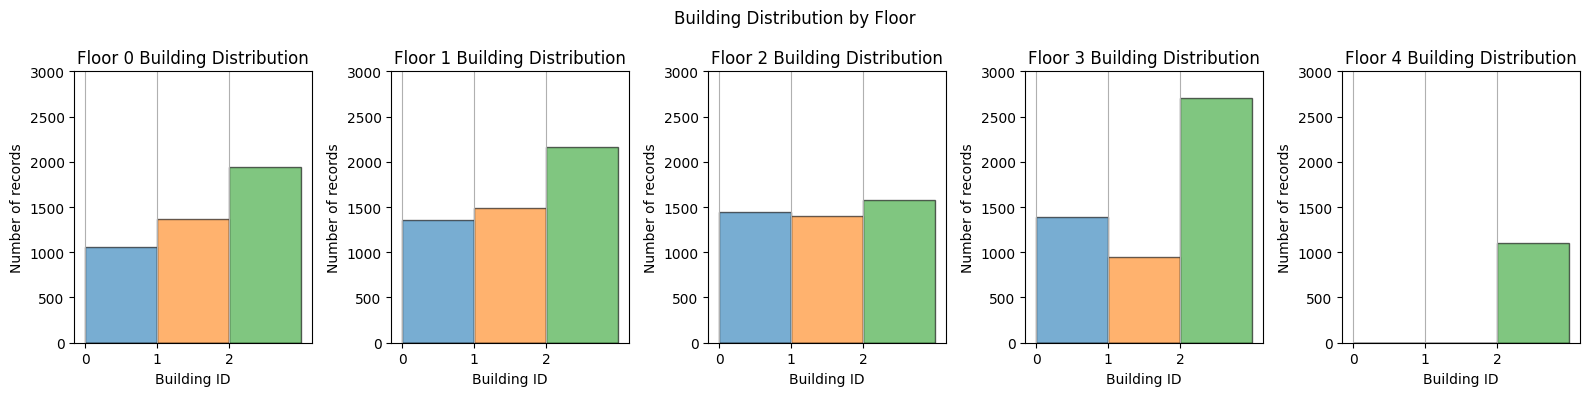

In [12]:
# Floor Distribution by Building
plt.figure(figsize=(16, 4))

for building in unique_buildings:
    plt.subplot(1, len(unique_buildings), building+1)  # Subplot per building
    for floor in unique_floors:
        df[(df["BUILDINGID"] == building) & (df["FLOOR"] == floor)]["FLOOR"].hist(
            alpha=0.6, bins=range(df["FLOOR"].min(), df["FLOOR"].max() + 2),
            edgecolor='black', label=f'Floor {floor}'
        )
    plt.title(f"Building {building} Floor Distribution")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_floors)
    plt.grid(axis='y')

plt.suptitle("Floor Distribution by Building")
plt.tight_layout()
plt.show()

# Building Distribution by Floor
plt.figure(figsize=(16, 4))

for floor in unique_floors:
    plt.subplot(1, len(unique_floors), floor+1)  # Subplot per floor
    for building in unique_buildings:
        df[(df["FLOOR"] == floor) & (df["BUILDINGID"] == building)]["BUILDINGID"].hist(
            alpha=0.6, bins=range(df["BUILDINGID"].min(), df["BUILDINGID"].max() + 2),
            edgecolor='black', label=f'Building {building}'
        )
    plt.title(f"Floor {floor} Building Distribution")
    plt.xlabel("Building ID")
    plt.ylabel("Number of records")
    plt.ylim(top=3000)
    plt.xticks(unique_buildings)
    plt.grid(axis='y')

plt.suptitle("Building Distribution by Floor")
plt.tight_layout()
plt.show()


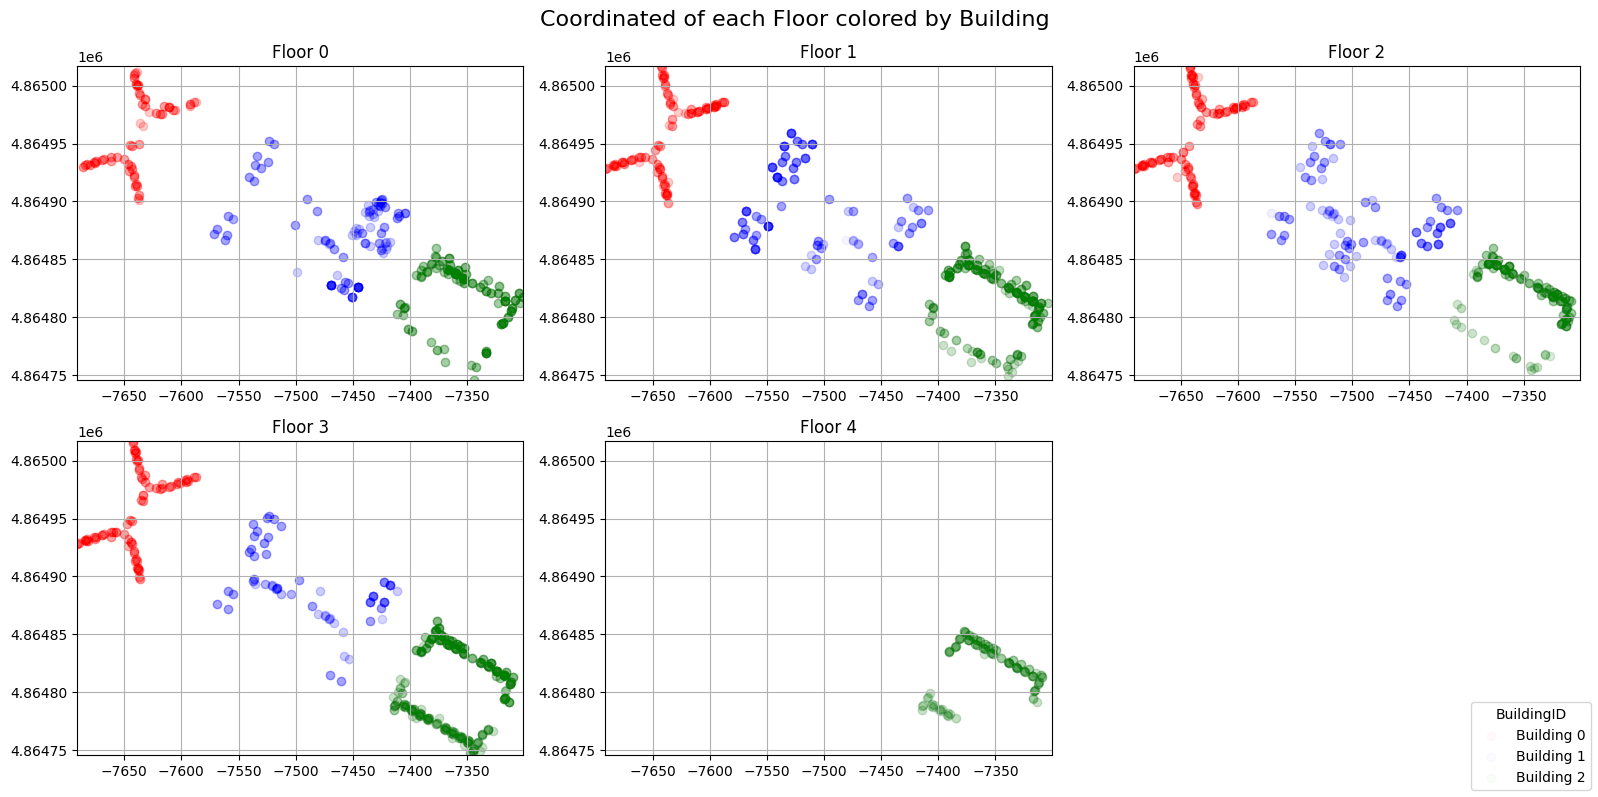

In [13]:
# Get consistent axis limits
x_min, x_max = df['LONGITUDE'].min(), df['LONGITUDE'].max()
y_min, y_max = df['LATITUDE'].min(), df['LATITUDE'].max()

# Define unique buildings and their corresponding colors
unique_buildings = sorted(df['BUILDINGID'].unique())
building_colors = {0: "red", 1: "blue", 2: "green"}

fig = plt.figure(figsize=(16, 8))
for floor in unique_floors:
    plt.subplot(2, 3, floor + 1)  # 2 rows, 3 columns, current plot index
    floor_data = df[df['FLOOR'] == floor]

    for building in unique_buildings:
        # Scatter plot with specific building color
        building_data = floor_data[floor_data['BUILDINGID'] == building]  

        plt.scatter(
            building_data['LONGITUDE'], building_data['LATITUDE'], 
            color=building_colors[building], alpha=0.02, label=f'Building {building}'
        )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(f'Floor {floor}')
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    plt.grid(True)

# Create a legend for buildings
labels = [f'Building {building}' for building in unique_buildings]
fig.legend(labels, loc='lower right', title='BuildingID')

# Adjust layout for better visualization
plt.suptitle('Coordinated of each Floor colored by Building', fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Joy: ====================================================================================
# Now I have an overview of how the buildings and floor look like
# =========================================================================================

### WAP columns

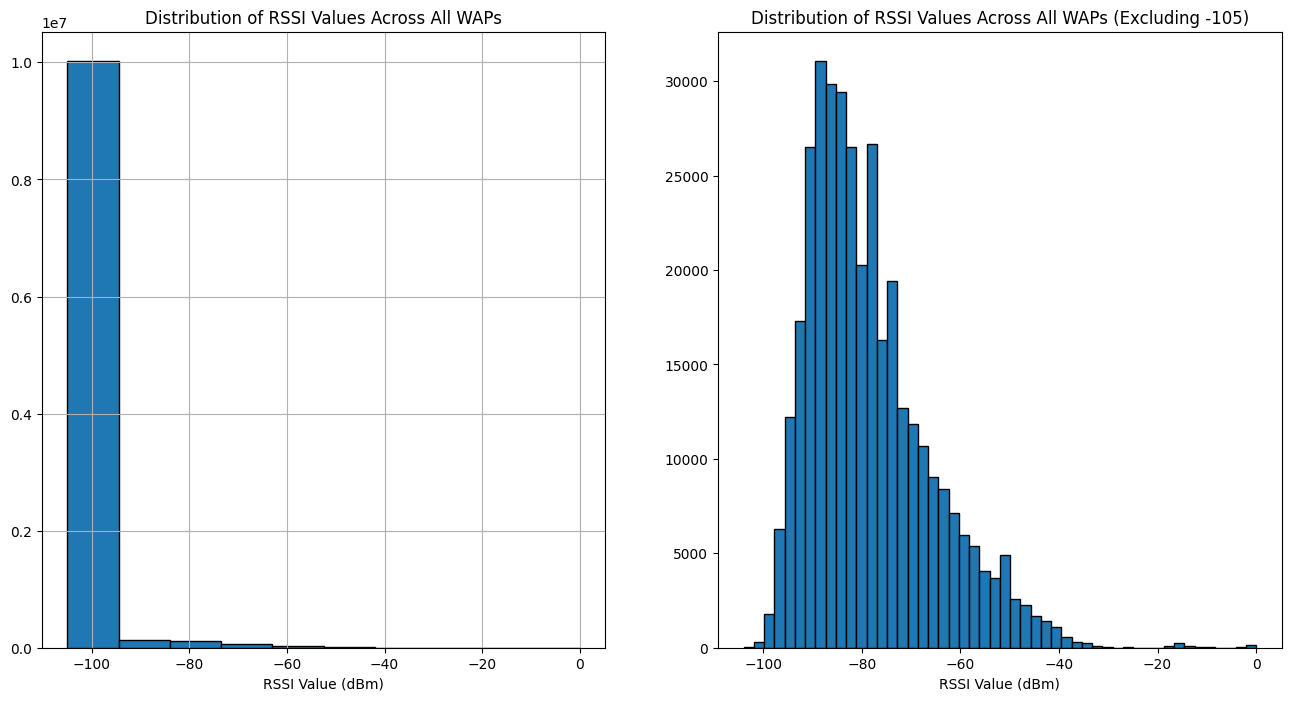

In [15]:
# Histogram of RSSI values
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
df[RSSI_columns].stack().hist(edgecolor='black')
plt.title("Distribution of RSSI Values Across All WAPs")
plt.xlabel("RSSI Value (dBm)")

# Histogram of RSSI values (excluding no signals)
plt.subplot(1,2,2)
df[RSSI_columns][df[RSSI_columns] != -105].stack().hist(edgecolor='black', bins=50)
plt.title("Distribution of RSSI Values Across All WAPs (Excluding -105)")
plt.xlabel("RSSI Value (dBm)")
plt.grid()
plt.show()

In [16]:
# Joy: ====================================================================================
# I want to understand if the WAP columns are floor or building specific
# =========================================================================================

In [17]:
WAP_floor_not_detected = []
WAP_floors = {}  

for WAP in RSSI_columns:
    detected_floors = sorted(df[df[WAP] != -105]["FLOOR"].unique())
    if len(detected_floors)==0: WAP_floor_not_detected.append(WAP)
    print(f"{WAP} is detected on floors: {detected_floors}")
    WAP_floors[WAP] = len(detected_floors)

print("\nWAPs not detected on any floor:")
print(WAP_floor_not_detected)


WAP001 is detected on floors: [2, 3]
WAP002 is detected on floors: [2, 3]
WAP003 is detected on floors: []
WAP004 is detected on floors: []
WAP005 is detected on floors: [2, 3, 4]
WAP006 is detected on floors: [0, 1, 2, 3]
WAP007 is detected on floors: [0, 1, 2, 3]
WAP008 is detected on floors: [0, 1, 2, 3]
WAP009 is detected on floors: [0, 1, 2, 3]
WAP010 is detected on floors: [1, 2, 3]
WAP011 is detected on floors: [1, 2, 3, 4]
WAP012 is detected on floors: [1, 2, 3, 4]
WAP013 is detected on floors: [0, 1, 2, 3]
WAP014 is detected on floors: [0, 1, 2, 3]
WAP015 is detected on floors: [0, 1, 2, 3]
WAP016 is detected on floors: [0, 1, 2, 3]
WAP017 is detected on floors: [0, 1, 2, 3]
WAP018 is detected on floors: [0, 1, 2, 3]
WAP019 is detected on floors: [0, 1, 2, 3]
WAP020 is detected on floors: [0, 1, 2, 3]
WAP021 is detected on floors: [1, 2, 3]
WAP022 is detected on floors: [2, 3]
WAP023 is detected on floors: [0, 1, 2, 3]
WAP024 is detected on floors: [0, 1, 2, 3]
WAP025 is detec

In [18]:
# Joy: ====================================================================================
# WAPs are not floor specific. Some dont even show any floors
# =========================================================================================

In [19]:
WAP_building_not_detected = []  
WAP_buildings = {}

for WAP in RSSI_columns:
    detected_buildings = sorted(df[df[WAP] != -105]["BUILDINGID"].unique())
    if len(detected_buildings)==0: WAP_building_not_detected.append(WAP)
    print(f"{WAP} is detected in buildings: {detected_buildings}")
    WAP_buildings[WAP]= len(detected_buildings)

print("\nWAPs not detected in any building:")
print(WAP_building_not_detected)


WAP001 is detected in buildings: [0]
WAP002 is detected in buildings: [0]
WAP003 is detected in buildings: []
WAP004 is detected in buildings: []
WAP005 is detected in buildings: [2]
WAP006 is detected in buildings: [1, 2]
WAP007 is detected in buildings: [0]
WAP008 is detected in buildings: [0, 1]
WAP009 is detected in buildings: [0]
WAP010 is detected in buildings: [1]
WAP011 is detected in buildings: [1, 2]
WAP012 is detected in buildings: [1, 2]
WAP013 is detected in buildings: [0]
WAP014 is detected in buildings: [0]
WAP015 is detected in buildings: [1]
WAP016 is detected in buildings: [1]
WAP017 is detected in buildings: [0, 1]
WAP018 is detected in buildings: [0, 2]
WAP019 is detected in buildings: [0]
WAP020 is detected in buildings: [0]
WAP021 is detected in buildings: [1]
WAP022 is detected in buildings: [1]
WAP023 is detected in buildings: [0, 1]
WAP024 is detected in buildings: [0, 1]
WAP025 is detected in buildings: [0]
WAP026 is detected in buildings: [0]
WAP027 is detect

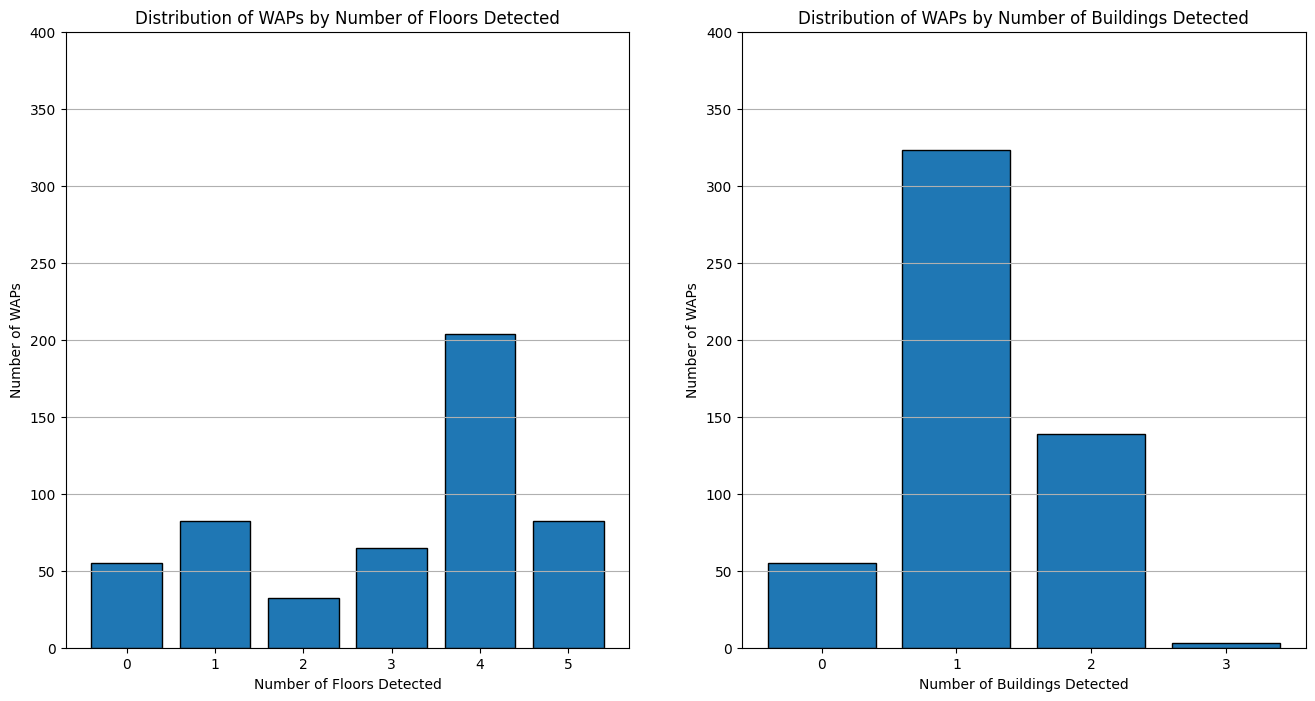

In [20]:
# Distribution of WAPs by Number of Floors Detected
floor_counts = {}
for wap, num_floors in WAP_floors.items():
    if num_floors not in floor_counts:
        floor_counts[num_floors] = 0
    floor_counts[num_floors] += 1

sorted_keys = sorted(floor_counts.keys())
sorted_values = [floor_counts[key] for key in sorted_keys]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Floors Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Floors Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")

# Distribution of WAPs by Number of Buildings Detected
building_counts = {}
for wap, num_buildings in WAP_buildings.items():
    if num_buildings not in building_counts:
        building_counts[num_buildings] = 0
    building_counts[num_buildings] += 1

sorted_keys = sorted(building_counts.keys())
sorted_values = [building_counts[key] for key in sorted_keys]

plt.subplot(1,2,2)
plt.bar(sorted_keys, sorted_values, edgecolor="black")
plt.xlabel("Number of Buildings Detected")
plt.ylabel("Number of WAPs")
plt.ylim(top=400)
plt.title("Distribution of WAPs by Number of Buildings Detected")
plt.xticks(sorted_keys)
plt.grid(axis="y")
plt.show()


In [21]:
# Joy: ====================================================================================
# WAPs are not building specific either. This is probably because the signal can travel far 
# in gaps or the area might be open. The list of WAP not detected might be the same as 
# we can remove those
# =========================================================================================

In [22]:
# Check if both lists contain the same WAPs
if set(WAP_building_not_detected) == set(WAP_floor_not_detected):
    print("Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.")
else:
    print("The lists are different. Some WAPs are missing in buildings but detected in floors, or vice versa.")

# Drop WAPs that are not detected in any building or floor
df.drop(columns=WAP_building_not_detected, inplace=True)
print(f"Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
print("Reloading the new WAP column list...")
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

Both `WAP_building_not_detected` and `WAP_floor_not_detected` are identical. The same WAPs are not detected in any building or floor.
Dropped 55 WAP columns that were never detected.
Reloading the new WAP column list...


In [23]:
# Joy: ====================================================================================
# Yes, they are the same. I deleted them as they won't help with anything
# Now, I still want to know if the WAP values can help predict building and floor I'll 
# visualize a a few RSSI signal by floor and by building
# =========================================================================================

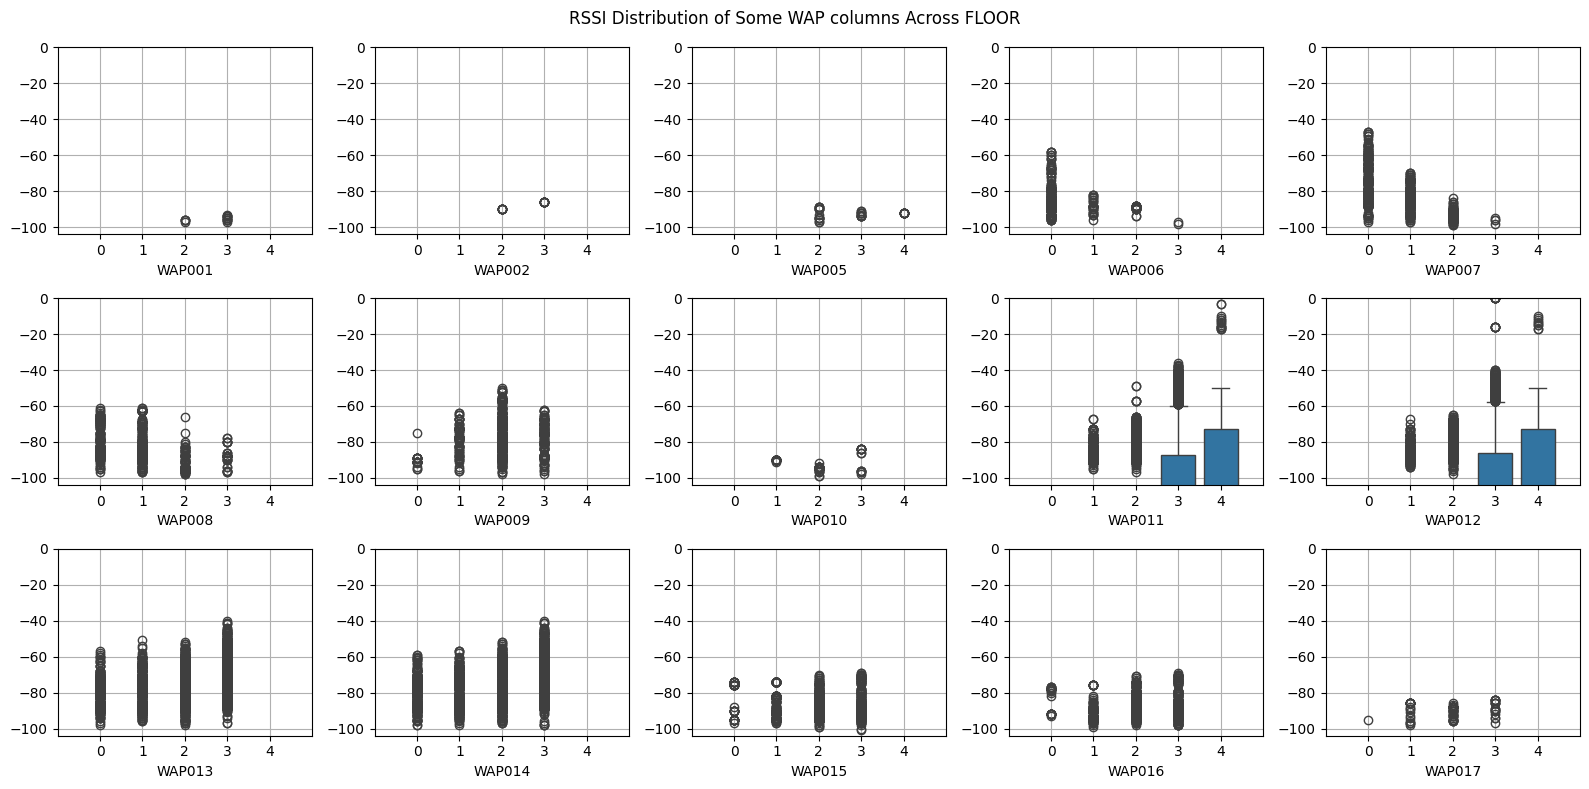

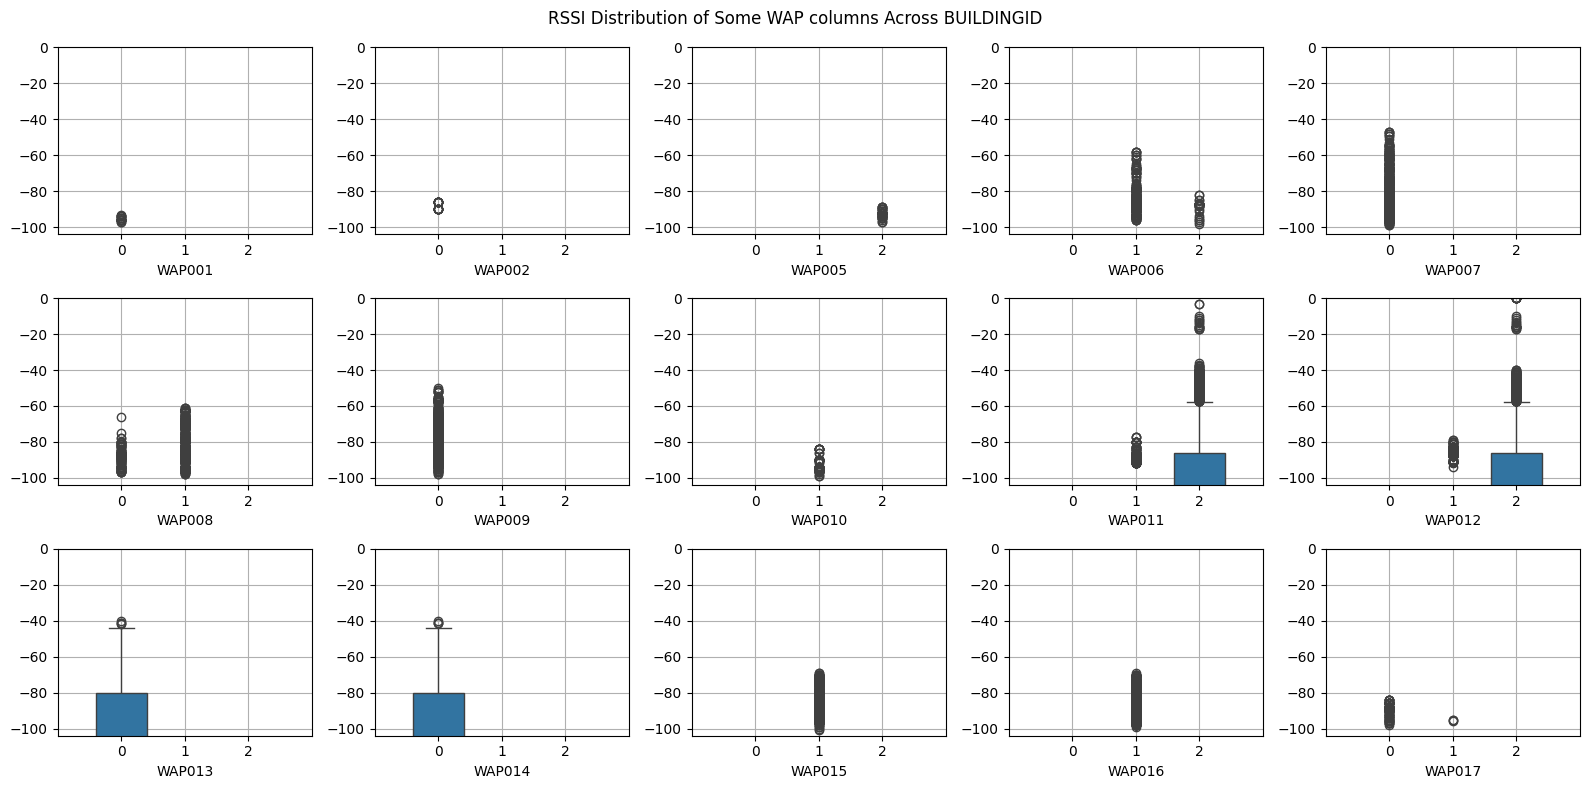

In [24]:
columns = 5
rows = 3

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["FLOOR"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 5)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across FLOOR")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for idx, wap_to_check in enumerate(RSSI_columns[:rows*columns], start=1):
    plt.subplot(rows, columns, idx)
    # Plot RSSI distribution across floors
    sns.boxplot(x=df["BUILDINGID"], y=df[wap_to_check])
    plt.xlabel(wap_to_check)
    plt.ylabel(None)
    plt.xlim(-1, 3)
    plt.ylim(-104, 0)
    plt.grid()
plt.suptitle(f"RSSI Distribution of Some WAP columns Across BUILDINGID")
plt.tight_layout()
plt.show()


In [25]:
df.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [26]:
# for index, row in df.iterrows():
#     detected_waps = [WAP for WAP in RSSI_columns if row[WAP] != -105]
#     print(f"Record {index}: Detected WAPs → {detected_waps}")

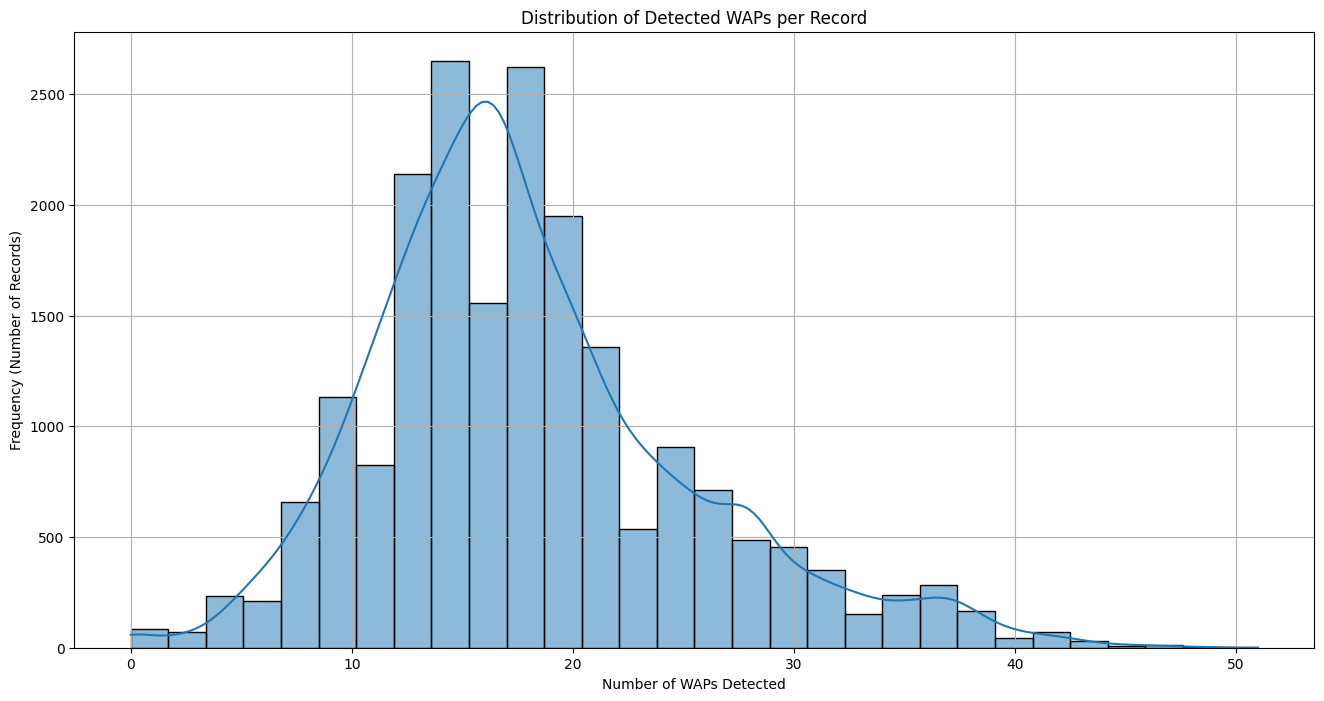

In [27]:
# Count detected WAPs per record
num_waps_detected = [len([WAP for WAP in RSSI_columns if row[WAP] != -105]) for _, row in df.iterrows()]

# Plot histogram
plt.figure(figsize=(16,8))
sns.histplot(num_waps_detected, bins=30, kde=True)
plt.xlabel("Number of WAPs Detected")
plt.ylabel("Frequency (Number of Records)")
plt.title("Distribution of Detected WAPs per Record")
plt.grid()
plt.show()


In [28]:
# # Get unique floors
# unique_floors = sorted(df["FLOOR"].unique())

# # Dictionary to store top WAPs per floor
# top_waps_per_floor = {}

# # Loop through each floor to find the most frequently detected WAPs
# for floor in unique_floors:
#     # Filter records for the specific floor
#     floor_df = df[df["FLOOR"] == floor]

#     # Count WAP appearances in the floor's records
#     wap_counts = Counter(WAP for _, row in floor_df.iterrows() for WAP in RSSI_columns if row[WAP] != -105)

#     # Get the top 10 most frequently detected WAPs
#     top_waps = sorted(wap_counts.items(), key=lambda x: x[1], reverse=True)[:25]
#     top_waps_per_floor[floor] = top_waps

# # Plot bar charts for each floor
# plt.figure(figsize=(16, 8))

# for idx, floor in enumerate(unique_floors, start=1):
#     plt.subplot(1, 5, idx)  # Create subplots
#     waps, counts = zip(*top_waps_per_floor[floor])
#     plt.bar(waps, counts, color="blue", alpha=0.7, edgecolor="black")
#     plt.xticks(rotation=90, fontsize=8)
#     plt.xlabel(f"floor {floor}")
#     # plt.ylabel("Number of Records Detected")
#     plt.grid(axis="y")

# plt.suptitle(f"Top 10 Most Frequent WAPs - Each Floor")
# plt.tight_layout()
# plt.show()


In [29]:
# Joy: ====================================================================================
# Each record receives at multiple signals access points too. I think we can feature
# engineer to map the max RSSI on a 
# =========================================================================================

In [30]:
# RSSI_multifloor = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     # If the WAP originally had high signals on multiple floors, add to list
#     if len(max_floors) > 1: RSSI_multifloor.append(WAP)
        
#     # If there are more than 1 floor for a max_value then check the next highest
#     while len(max_floors) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_floors = sorted(df[df[WAP] == max_value]["FLOOR"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on floors: {max_floors}")
# print("RSSI_multifloor (WAPs that have high signals on multiple floors):", RSSI_multifloor)

# WAP_multibuilding = [] 
# for WAP in RSSI_columns:
#     max_value = df[WAP].max() 
#     max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     # If the WAP originally had high signals on multiple buildings, add to list
#     if len(max_buildings) > 1: WAP_multibuilding.append(WAP)
        
#     # If there are more than 1 building for a max_value then check the next highest
#     while len(max_buildings) > 1:
#         max_value = df[df[WAP] < max_value][WAP].max()  # Find the next highest RSSI
#         max_buildings = sorted(df[df[WAP] == max_value]["BUILDINGID"].unique())  

#     print(f"{WAP} has max RSSI {max_value:>3} detected on buildings: {max_buildings}")
# print("WAP_multibuilding (WAPs that have high signals on multiple buildings):", RSSI_multifloor)



## Data Cleaning and Preparation

In [31]:
"""
Data Cleaning and Preparation:
    Handle any missing values and normalize the RSSI measurements.
    Scale features appropriately and encode any categorical variables if needed.
    Optionally, apply feature reduction techniques (e.g., PCA) to reduce noise and improve model efficiency.

"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df[other_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LONGITUDE         19937 non-null  float64
 1   LATITUDE          19937 non-null  float64
 2   FLOOR             19937 non-null  int64  
 3   BUILDINGID        19937 non-null  int64  
 4   SPACEID           19937 non-null  int64  
 5   RELATIVEPOSITION  19937 non-null  int64  
 6   USERID            19937 non-null  int64  
 7   PHONEID           19937 non-null  int64  
 8   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


### Missing values

In [32]:
df.isna().sum().any()

False

In [33]:
# Joy: ====================================================================================
# There are no missing values and the not-detected WAP are already converted from 100 to -105 
# =========================================================================================

### Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])

scaler_coords = MinMaxScaler(feature_range=(0, 1))
df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])

In [35]:
# Joy: ====================================================================================
# Standard Scaling, MinMaxScaler does not assume a normal distribution and scaling the 
# coordinates will improve distance-based models like SVM, Neural Networks
# =========================================================================================

In [36]:
categorical_columns = ["BUILDINGID", "FLOOR"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
building_columns = [col for col in df.columns if col.startswith("BUILDINGID")]
floor_columns = [col for col in df.columns if col.startswith("FLOOR")]

### PCA

In [37]:
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(df[RSSI_columns])

# Summary of data processing
num_original_features = len(RSSI_columns)
num_components = pca.n_components_
num_features_removed = num_original_features - num_components

print(f"Data Cleaning and Preparation Completed.")
print(f"PCA removed {num_features_removed} of the original {num_original_features} RSSI columns")


Data Cleaning and Preparation Completed.
PCA removed 298 of the original 465 RSSI columns


In [38]:
df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(num_components)])

# Add non-RSSI columns back if needed
df_pca["LONGITUDE"] = df["LONGITUDE"]
df_pca["LATITUDE"] = df["LATITUDE"]
df_pca[building_columns] = df[building_columns]
df_pca[floor_columns] = df[floor_columns]

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_166,PCA_167,LONGITUDE,LATITUDE,BUILDINGID_1,BUILDINGID_2,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,0.113872,0.025619,0.175059,0.696618,0.379238,-0.333301,1.272969,0.357313,0.051137,-0.399208,...,-0.003532,0.004523,0.384294,0.646015,1,0,0,1,0,0
1,0.107321,0.025230,0.160788,0.646997,0.353115,-0.295829,1.139038,0.315768,-0.028676,-0.290573,...,-0.016020,0.007954,0.396183,0.695646,1,0,0,1,0,0
2,0.038747,0.001399,0.177835,0.546049,0.191126,-0.327867,0.958327,0.238142,0.277187,-0.267378,...,-0.009463,0.014025,0.440915,0.752141,1,0,0,1,0,0
3,0.120268,0.026108,0.207935,0.693314,0.302354,-0.279097,1.204659,0.277865,0.225793,-0.549166,...,-0.017145,0.017909,0.427042,0.695158,1,0,0,1,0,0
4,0.052954,0.014135,0.043840,0.159255,0.024035,-0.022076,0.047522,-0.051472,-0.108323,0.017206,...,0.001996,-0.000548,0.151580,0.872775,0,0,0,0,0,0


In [39]:
# Joy: ====================================================================================
# For model testing we will preserve the real columns at first to see if we don't need to 
# apply PCA 
# =========================================================================================

### Making the data cleaning process reproducible

In [40]:
def load_and_clean_dataset(path):
    print(f"Loading {path} and applying the same preprocessing")
    df = pd.read_csv(path)

    print(">> The values in WAPxxx columns with 100 is turned into -105")
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
    df[RSSI_columns] = df[RSSI_columns].replace(100, -105)

    print(f">> Dropped {len(WAP_building_not_detected)} WAP columns that were never detected.")
    df.drop(columns=WAP_building_not_detected, inplace=True)
    RSSI_columns = [col for col in df.columns if col.startswith("WAP")]

    print(">> Checking if there are any missing values:", df.isna().sum().any())

    print(">> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler")
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[RSSI_columns] = scaler.fit_transform(df[RSSI_columns])
    scaler_coords = MinMaxScaler(feature_range=(0, 1))
    df[["LONGITUDE", "LATITUDE"]] = scaler_coords.fit_transform(df[["LONGITUDE", "LATITUDE"]])
    
    return df

# Model Development

In [41]:
# Joy: ====================================================================================
# Basic Model Classification: Develop a simple machine learning model (e.g., Decision Tree 
# or SVM) to predict the Building ID and Floor based on WiFi fingerprints.'

# Advanced Model Regression: Develop an advanced regression model (e.g., a neural network-
# based regressor) to enhance coordinate estimation
# =========================================================================================

## Loading and re-cleaning data 

In [42]:
# Joy: ====================================================================================
# I've thought about whether to involve the validationData.csv in model development but I 
# decided to keep it untouched till the end therefore for the whole model# development will 
# only use the trainingData.csv and the validationData.csv will simulate using the developed 
# model in the real
# =========================================================================================

df = load_and_clean_dataset("./UJIndoorLoc/trainingData.csv")
df.head()

Loading ./UJIndoorLoc/trainingData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.384294,0.646015,2,1,106,2,2,23,1371713733
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.396183,0.695646,2,1,106,2,2,23,1371713691
2,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.440915,0.752141,2,1,103,2,2,23,1371714095
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.427042,0.695158,2,1,102,2,2,23,1371713807
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.151580,0.872775,0,0,122,2,11,13,1369909710


In [43]:
RSSI_columns = [col for col in df.columns if col.startswith("WAP")]
COORD_columns = ["LONGITUDE", "LATITUDE"]
FLOOR_BUILDING_columns = ["FLOOR", "BUILDINGID"]

print("RSSI_columns:", RSSI_columns)
print("COORD_columns:", COORD_columns)
print("FLOOR_BUILDING_columns:", FLOOR_BUILDING_columns)

RSSI_columns: ['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100', 'WAP101', 'WAP102', 'WAP103', 'WAP104', 'WAP1

## Basic Model Classification

In [44]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df[RSSI_columns]
y_building = df["BUILDINGID"]
y_floor = df["FLOOR"]

# Spliting the training and testing dataset 
X_train, X_test, yb_train, yb_test = train_test_split(X, y_building, test_size=0.2, random_state=42)
_, _, yf_train, yf_test = train_test_split(X, y_floor, test_size=0.2, random_state=42) 

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(modelName, yb_test, yb_pred, yf_test, yf_pred):

    combined_data = [ (yb_test, yb_pred, "Building ID"), (yf_test, yf_pred, "Floor")]
        
    # Classification Report
    for y_true, y_pred, title in combined_data:
        print(f"============== {modelName} {title} ==============")
        
        print(">> Accuracy:".ljust(22), accuracy_score(y_true, y_pred))
        print(">> Precision macro:".ljust(22), precision_score(y_true, y_pred, average='macro'))
        print(">> Precision micro:".ljust(22), precision_score(y_true, y_pred, average='micro'))
        print(">> Precision weighted:".ljust(22), precision_score(y_true, y_pred, average='weighted'))

        print(">> Recall macro:".ljust(22), recall_score(y_true, y_pred, average='macro'))
        print(">> Recall micro:".ljust(22), recall_score(y_true, y_pred, average='micro'))
        print(">> Recall weighted:".ljust(22), recall_score(y_true, y_pred, average='weighted'))

        print(">> F1 Score macro:".ljust(22), f1_score(y_true, y_pred, average='macro'))
        print(">> F1 Score micro:".ljust(22), f1_score(y_true, y_pred, average='micro'))
        print(">> F1 Score weighted:".ljust(22), f1_score(y_true, y_pred, average='weighted'))

        print(classification_report(y_true, y_pred, digits=3))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(12, 5))
    for i, (y_true, y_pred, title) in enumerate(combined_data):
        cm = confusion_matrix(y_true, y_pred)
        plt.subplot(1, 2, i+1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(title)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
    plt.suptitle(f"Confusion Matrix {modelName}")
    plt.tight_layout()
    plt.show()


### Decision Tree

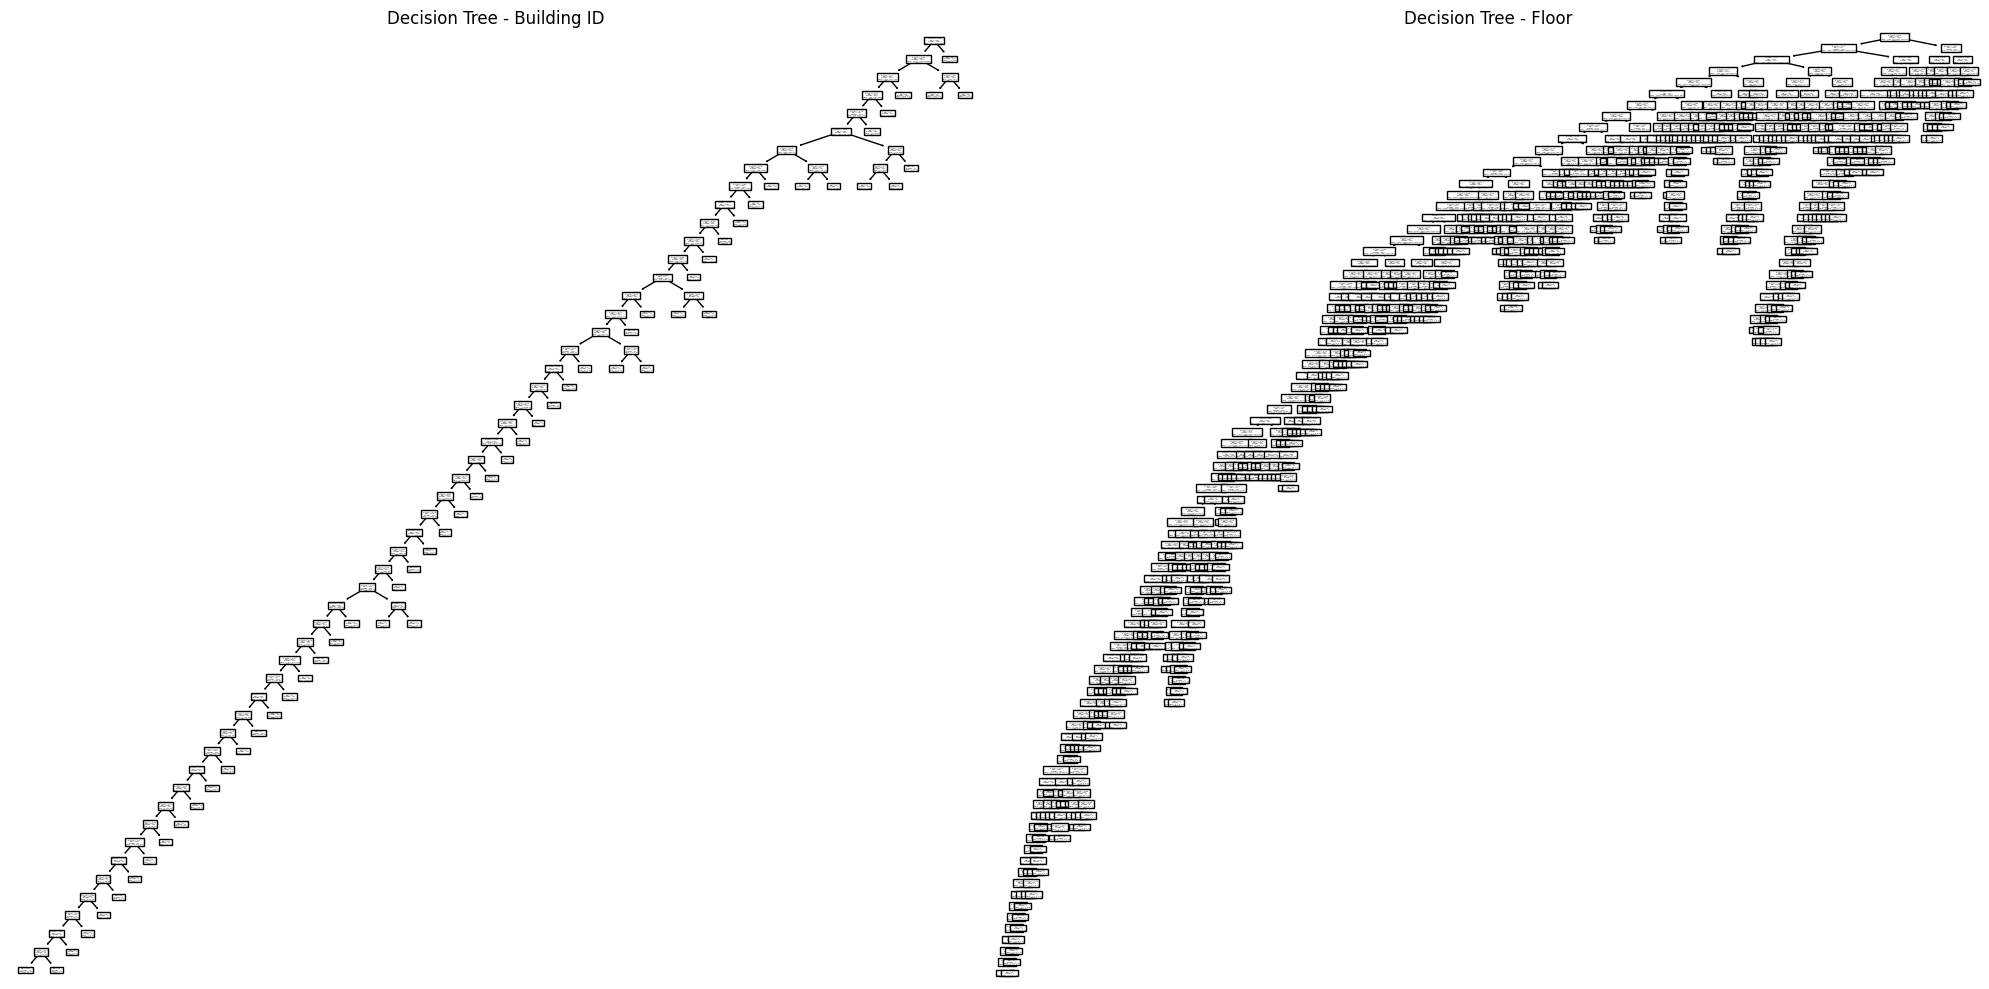

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train Decision Trees
tree_building = DecisionTreeClassifier(random_state=42)
tree_building.fit(X_train, yb_train)
tree_yb_pred = tree_building.predict(X_test)

tree_floor = DecisionTreeClassifier(random_state=42)
tree_floor.fit(X_train, yf_train)
tree_yf_pred = tree_floor.predict(X_test)

# Confusion Matrix Heatmap Subplots
plt.figure(figsize=(20, 10))
combined_trees = [(tree_building, "Building ID"), (tree_floor, "Floor")]

for i, (tree_model, title) in enumerate(combined_trees):
    plt.subplot(1, 2, i + 1)
    plot_tree(
        tree_model,
        feature_names=RSSI_columns,
        class_names=[str(c) for c in sorted(df[title.upper().replace(" ", "")].unique())],
    )
    plt.title(f"Decision Tree - {title}")

plt.tight_layout()
plt.show()

============== Decision Tree Building ID ==============
>> Accuracy:           0.9977432296890673
>> Precision macro:    0.997029702970297
>> Precision micro:    0.9977432296890673
>> Precision weighted: 0.997763339523521
>> Recall macro:       0.9984284965950759
>> Recall micro:       0.9977432296890673
>> Recall weighted:    0.9977432296890673
>> F1 Score macro:     0.9977205965770567
>> F1 Score micro:     0.9977432296890673
>> F1 Score weighted:  0.9977456134709664
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1078
           1      0.991     1.000     0.996      1001
           2      1.000     0.995     0.998      1909

    accuracy                          0.998      3988
   macro avg      0.997     0.998     0.998      3988
weighted avg      0.998     0.998     0.998      3988

============== Decision Tree Floor ==============
>> Accuracy:           0.9724172517552658
>> Precision macro:    0.9738232098706364
>> Precisio

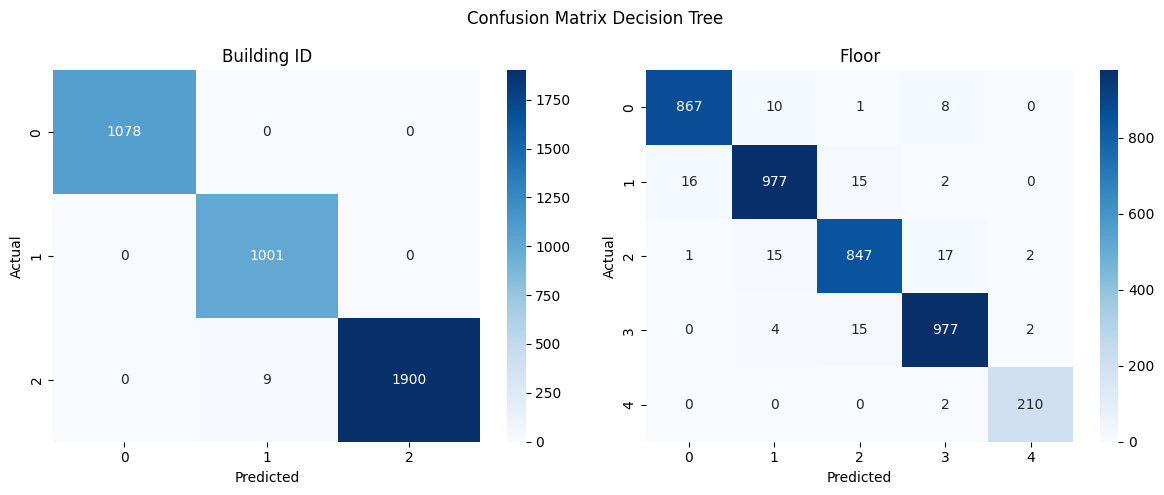

In [47]:
evaluate_classification("Decision Tree", yb_test, tree_yb_pred, yf_test, tree_yf_pred)

In [48]:
# Joy: ====================================================================================
# The metrics for one decision tree is already looking good. If we want a very quick model
# done on a slow computer, this is more than enough. For the sake of model development let's
# try more models
# =========================================================================================

📝 JOY if you have time try to put the manual decision trees from the lab 

### SVM

In [49]:
# Joy: ====================================================================================
# Usually PCA is performed on highdimensional data like this but I want to preserve the 
# feature columns so I'll try without it
# =========================================================================================

============== SVM Building ID ==============
>> Accuracy:           0.9979939819458375
>> Precision macro:    0.9973571192599934
>> Precision micro:    0.9979939819458375
>> Precision weighted: 0.9980098869452758
>> Recall macro:       0.998603108084512
>> Recall micro:       0.9979939819458375
>> Recall weighted:    0.9979939819458375
>> F1 Score macro:     0.9979733876549014
>> F1 Score micro:     0.9979939819458375
>> F1 Score weighted:  0.9979958679658674
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1078
           1      0.992     1.000     0.996      1001
           2      1.000     0.996     0.998      1909

    accuracy                          0.998      3988
   macro avg      0.997     0.999     0.998      3988
weighted avg      0.998     0.998     0.998      3988

============== SVM Floor ==============
>> Accuracy:           0.9932296890672017
>> Precision macro:    0.9936978415812712
>> Precision micro:    0.99322

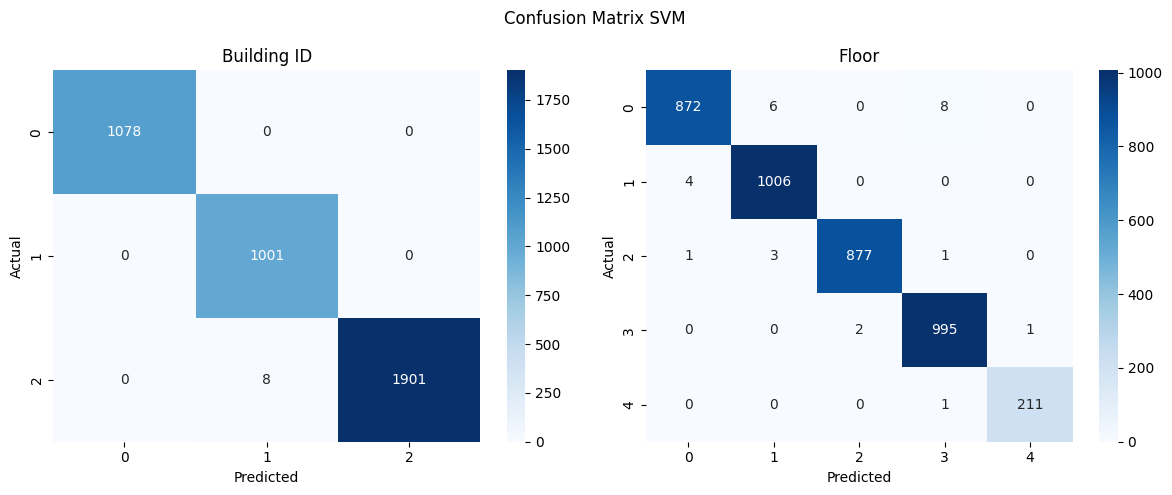

In [50]:
from sklearn.svm import SVC

# Train SVM
svm_building = SVC(kernel='linear', C=1, random_state=42)
svm_building.fit(X_train, yb_train)
svm_yb_pred = svm_building.predict(X_test)

svm_floor = SVC(kernel='linear', C=1, random_state=42)
svm_floor.fit(X_train, yf_train)
svm_yf_pred = svm_floor.predict(X_test)

evaluate_classification("SVM", yb_test, svm_yb_pred, yf_test, svm_yf_pred)

In [51]:
# Joy: ====================================================================================
# Even without performing PCA the results are still very good, better than decision trees. 
# =========================================================================================

In [52]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # This idea to visualize this simpler version of SVM is from GPT

# # Fit PCA on the entire test set 
# pca = PCA(n_components=2)
# X_test_pca = pca.fit_transform(X_test)

# # Plot side-by-side
# plt.figure(figsize=(14, 6))

# # Subplot 1 – Building ID
# plt.subplot(1, 2, 1)
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_yb_pred, cmap="viridis", alpha=0.6)
# plt.title("SVM Predictions (Building ID) in PCA Space")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.grid(True)
# plt.colorbar(label="Predicted Building")

# # Subplot 2 – Floor
# plt.subplot(1, 2, 2)
# plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_yf_pred, cmap="plasma", alpha=0.6)
# plt.title("SVM Predictions (Floor) in PCA Space")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.grid(True)
# plt.colorbar(label="Predicted Floor")

# plt.tight_layout()
# plt.show()

# from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# # Fit PCA with 3 components
# pca_3d = PCA(n_components=3)
# X_test_pca_3d = pca_3d.fit_transform(X_test)

# # Setup figure
# fig = plt.figure(figsize=(14, 6))

# # Subplot 1 – Building ID
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# sc1 = ax1.scatter(
#     X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
#     c=yb_pred_svm, cmap="viridis", alpha=0.6
# )
# ax1.set_title("SVM Predictions (Building ID) - 3D PCA")
# ax1.set_xlabel("PC1")
# ax1.set_ylabel("PC2")
# ax1.set_zlabel("PC3")
# fig.colorbar(sc1, ax=ax1, shrink=0.5, label="Predicted Building")

# # Subplot 2 – Floor
# ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# sc2 = ax2.scatter(
#     X_test_pca_3d[:, 0], X_test_pca_3d[:, 1], X_test_pca_3d[:, 2],
#     c=yf_pred_svm, cmap="plasma", alpha=0.6
# )
# ax2.set_title("SVM Predictions (Floor) - 3D PCA")
# ax2.set_xlabel("PC1")
# ax2.set_ylabel("PC2")
# ax2.set_zlabel("PC3")
# fig.colorbar(sc2, ax=ax2, shrink=0.5, label="Predicted Floor")

# plt.tight_layout()
# plt.show()


### Random Forest

============== Random Forest Building ID ==============
>> Accuracy:           0.9979939819458375
>> Precision macro:    0.9973571192599934
>> Precision micro:    0.9979939819458375
>> Precision weighted: 0.9980098869452758
>> Recall macro:       0.998603108084512
>> Recall micro:       0.9979939819458375
>> Recall weighted:    0.9979939819458375
>> F1 Score macro:     0.9979733876549014
>> F1 Score micro:     0.9979939819458375
>> F1 Score weighted:  0.9979958679658674
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1078
           1      0.992     1.000     0.996      1001
           2      1.000     0.996     0.998      1909

    accuracy                          0.998      3988
   macro avg      0.997     0.999     0.998      3988
weighted avg      0.998     0.998     0.998      3988

============== Random Forest Floor ==============
>> Accuracy:           0.995987963891675
>> Precision macro:    0.9967389681262985
>> Precisio

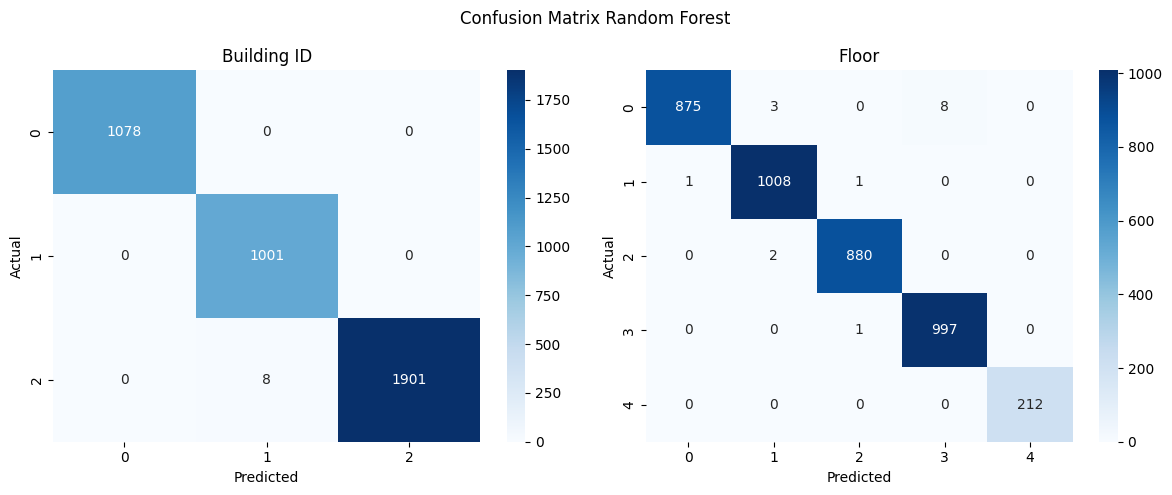

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_building = RandomForestClassifier(random_state=42)
rf_building.fit(X_train, yb_train)
rf_yb_pred = rf_building.predict(X_test)

rf_floor = RandomForestClassifier(random_state=42)
rf_floor.fit(X_train, yf_train)
rf_yf_pred = rf_floor.predict(X_test)

evaluate_classification("Random Forest", yb_test, rf_yb_pred, yf_test, rf_yf_pred)

In [54]:
# Joy: ====================================================================================
# Among the three models, random forest performed the best on our fixed test portion of 
# the dataset. The results are extremly good and I'm skeptical so let's do some CV 
# =========================================================================================

### Applying K-fold Cross validation

In [55]:
from sklearn.model_selection import KFold, cross_val_score

print("========= Cross-Validation Analysis ========= ")

# Implement k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
metrics = ['accuracy', 
           'precision_macro', 'precision_micro', 'precision_weighted', 
           'recall_macro', 'recall_micro', 'recall_weighted', 
           'f1_macro', 'f1_micro', 'f1_weighted']

models = [
    ('tree_building', tree_building, y_building),
    ('tree_floor', tree_floor, y_floor),
    ('svm_building', svm_building, y_building),
    ('svm_floor', svm_floor, y_floor),
    ('rf_building', rf_building, y_building),
    ('rf_floor', rf_floor, y_floor),
]

# Calculate cross-validation scores
cv_scores = {}
for modelName, model, y in models:
    print(f"Calculating scores for {modelName}")
    cv_scores[modelName] = {}
    for metric in metrics:
        cv_scores[modelName][metric] =  cross_val_score(model, X, y, cv=kf, scoring=metric).mean()
        print(f">> {modelName} {metric}:".ljust(40), cv_scores[modelName][metric])
pd.DataFrame(cv_scores).T.sort_values(by='f1_weighted', ascending=False)

========= Cross-Validation Analysis ========= 
Calculating scores for tree_building
>> tree_building accuracy:               0.9968902442399955
>> tree_building precision_macro:        0.9968289212800293
>> tree_building precision_micro:        0.9968902442399955
>> tree_building precision_weighted:     0.9969142338692919
>> tree_building recall_macro:           0.9968742229235042
>> tree_building recall_micro:           0.9968902442399955
>> tree_building recall_weighted:        0.9968902442399955
>> tree_building f1_macro:               0.9968393375615179
>> tree_building f1_micro:               0.9968902442399955
>> tree_building f1_weighted:            0.9968908084628918
Calculating scores for tree_floor
>> tree_floor accuracy:                  0.9743189679424628
>> tree_floor precision_macro:           0.9747005924184237
>> tree_floor precision_micro:           0.9743189679424628
>> tree_floor precision_weighted:        0.974386750353953
>> tree_floor recall_macro:              0.

,accuracy,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted
svm_building,0.997793,0.997725,0.997793,0.997810,0.997902,0.997793,0.997793,0.997805,0.997793,0.997793
rf_building,0.997743,0.997962,0.997743,0.997758,0.997602,0.997743,0.997743,0.997774,0.997743,0.997742
tree_building,0.996890,0.996829,0.996890,0.996914,0.996874,0.996890,0.996890,0.996839,0.996890,0.996891
rf_floor,0.996740,0.997230,0.996740,0.996764,0.997208,0.996740,0.996740,0.997209,0.996740,0.996741
svm_floor,0.993178,0.994047,0.993178,0.993203,0.993367,0.993178,0.993178,0.993692,0.993178,0.993177
tree_floor,0.974319,0.974701,0.974319,0.974387,0.976212,0.974319,0.974319,0.975401,0.974319,0.974306


In [56]:
# Joy: ====================================================================================
# The results from the normal train-test split seems to be representative of the results in 
# our 10-fold CV. Therefore, RF is still the best model and the risk of overfitting is low.
# Using the validationData.csv will simulate the performance when the model is applied in 
# the real world
# =========================================================================================

### Simulating real-life deployment with validationData.csv

Loading ./UJIndoorLoc/validationData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler

============== Validation Decision Tree Building ID ==============
>> Accuracy:           0.9774977497749775
>> Precision macro:    0.9738473262956014
>> Precision micro:    0.9774977497749775
>> Precision weighted: 0.977664711962851
>> Recall macro:       0.9774843210656815
>> Recall micro:       0.9774977497749775
>> Recall weighted:    0.9774977497749775
>> F1 Score macro:     0.9756261119551614
>> F1 Score micro:     0.9774977497749775
>> F1 Score weighted:  0.9775414214403688
              precision    recall  f1-score   support

           0      0.992     0.979     0.986       536
           1      0.955     0.964     0.959       307
           2      0.

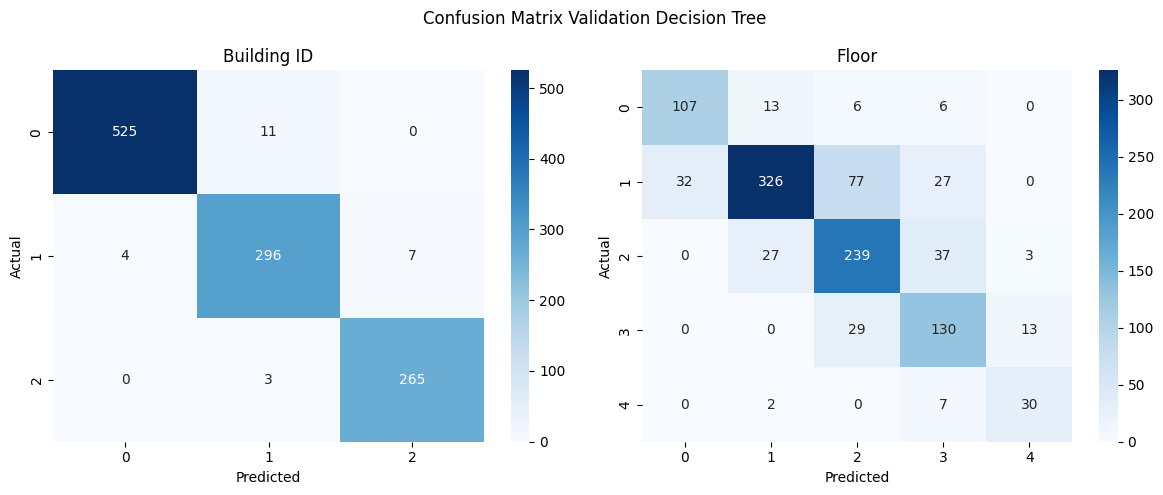

============== Validation SVM Building ID ==============
>> Accuracy:           0.9972997299729973
>> Precision macro:    0.9970496274610136
>> Precision micro:    0.9972997299729973
>> Precision weighted: 0.9973001345618926
>> Recall macro:       0.9972065567925843
>> Recall micro:       0.9972997299729973
>> Recall weighted:    0.9972997299729973
>> F1 Score macro:     0.9971260556181184
>> F1 Score micro:     0.9972997299729973
>> F1 Score weighted:  0.9972983655415311
              precision    recall  f1-score   support

           0      0.998     0.998     0.998       536
           1      0.997     0.993     0.995       307
           2      0.996     1.000     0.998       268

    accuracy                          0.997      1111
   macro avg      0.997     0.997     0.997      1111
weighted avg      0.997     0.997     0.997      1111

============== Validation SVM Floor ==============
>> Accuracy:           0.8973897389738974
>> Precision macro:    0.8586734099682113
>> Prec

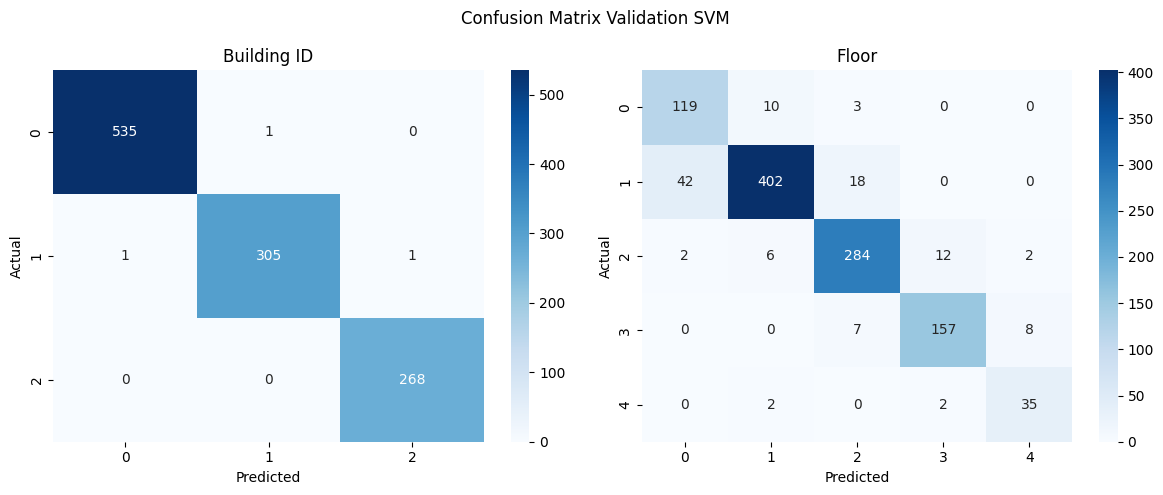

============== Validation Random Forest Building ID ==============
>> Accuracy:           0.9990999099909991
>> Precision macro:    0.9993792675356921
>> Precision micro:    0.9990999099909991
>> Precision weighted: 0.9991015861362673
>> Recall macro:       0.998914223669924
>> Recall micro:       0.9990999099909991
>> Recall weighted:    0.9990999099909991
>> F1 Score macro:     0.9991455707268274
>> F1 Score micro:     0.9990999099909991
>> F1 Score weighted:  0.9990995952498105
              precision    recall  f1-score   support

           0      0.998     1.000     0.999       536
           1      1.000     0.997     0.998       307
           2      1.000     1.000     1.000       268

    accuracy                          0.999      1111
   macro avg      0.999     0.999     0.999      1111
weighted avg      0.999     0.999     0.999      1111

============== Validation Random Forest Floor ==============
>> Accuracy:           0.9036903690369037
>> Precision macro:    0.89860

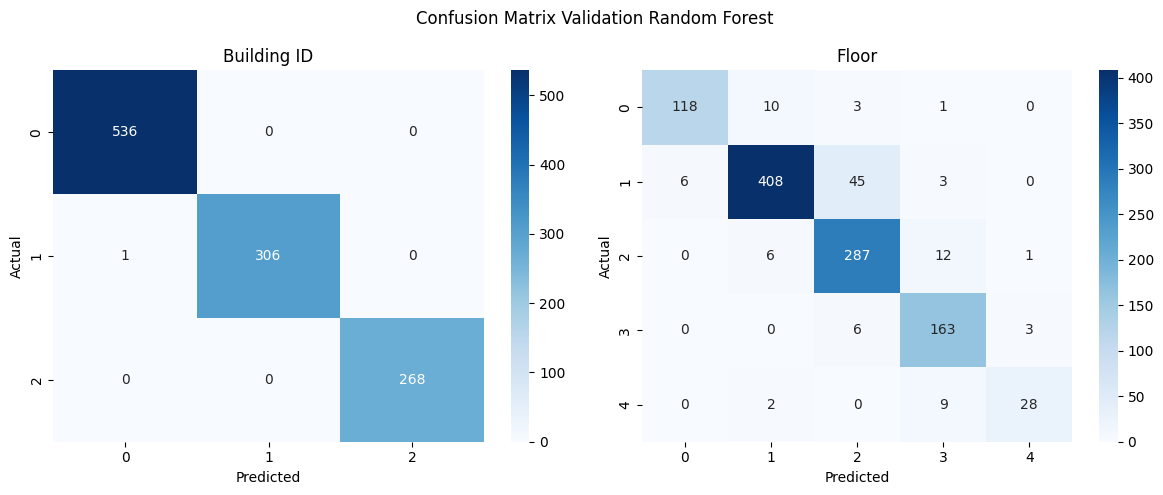

In [57]:
val_df = load_and_clean_dataset("./UJIndoorLoc/validationData.csv")
val_X = val_df[[col for col in val_df.columns if col.startswith("WAP")]]

print()
val_tree_yb_pred = tree_building.predict(val_X)
val_tree_yf_pred = tree_floor.predict(val_X)
evaluate_classification("Validation Decision Tree", val_df['BUILDINGID'], val_tree_yb_pred, val_df['FLOOR'], val_tree_yf_pred)

val_svm_yb_pred = svm_building.predict(val_X)
val_svm_yf_pred = svm_floor.predict(val_X)
evaluate_classification("Validation SVM", val_df['BUILDINGID'], val_svm_yb_pred, val_df['FLOOR'], val_svm_yf_pred)

val_rf_yb_pred = rf_building.predict(val_X)
val_rf_yf_pred = rf_floor.predict(val_X)
evaluate_classification("Validation Random Forest", val_df['BUILDINGID'], val_rf_yb_pred, val_df['FLOOR'], val_rf_yf_pred)

In [58]:
# Joy: ====================================================================================
# The model seems to work well on our simulation. The model could be improved with 
# hyperparameter tuning though.
# =========================================================================================

### Hyperparameter tuning on Random Forest

In [59]:
# Joy: ====================================================================================
# Since we learned Differential Evolution in another class, I know it is good for 
# hyperparamter tuning so I'll attempt to implement it here with CV because overfitting is 
# a great risk when applying hyperparameter tuning. I needed the help of GPT to use the 
# differential_evolution function from scipy.optimize
# =========================================================================================

tuned BUILDINGID RandomForest in 1064.0824542045593 seconds.
Best hyperparameters for BUILDINGID:
>> n_estimators      = {76}
>> max_depth         = {48}
>> min_samples_split = {4}
>> max_features      = {0.24160228740609407}

 tuned FLOOR RandomForest in 3694.535838365555 seconds.
Best hyperparameters for FLOOR:
>> n_estimators      = {145}
>> max_depth         = {46}
>> min_samples_split = {2}
>> max_features      = {0.12611022100664532}

============== Random Forest (Tuned) Building ID ==============
>> Accuracy:           0.9979939819458375
>> Precision macro:    0.9973571192599934
>> Precision micro:    0.9979939819458375
>> Precision weighted: 0.9980098869452758
>> Recall macro:       0.998603108084512
>> Recall micro:       0.9979939819458375
>> Recall weighted:    0.9979939819458375
>> F1 Score macro:     0.9979733876549014
>> F1 Score micro:     0.9979939819458375
>> F1 Score weighted:  0.9979958679658674
              precision    recall  f1-score   support

           0     

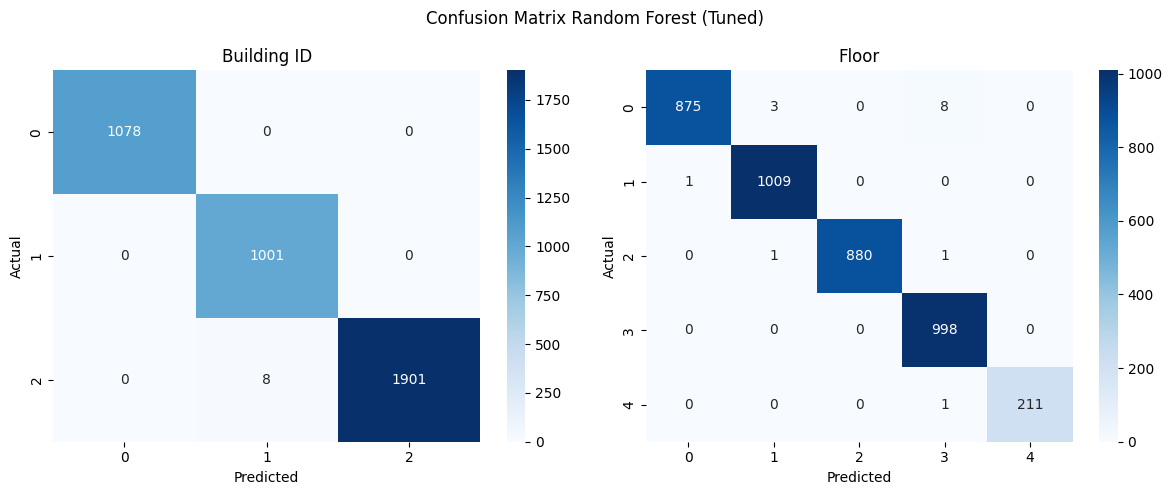

In [60]:
from scipy.optimize import differential_evolution
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

# Bounds for: n_estimators, max_depth, min_samples_split, max_features
param_bounds = [
    (50, 200),    # n_estimators
    (5, 50),      # max_depth
    (2, 10),      # min_samples_split
    (0.1, 1.0),   # max_features (fraction of features)
]

# Fitness function
def rf_fitness(params, X, y):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    max_features = float(params[3])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(model, X, y, cv=5, scoring='f1_macro').mean()
    return -score

# Run DE for Building ID
start_b = time.time()
result_building = differential_evolution(rf_fitness, bounds=param_bounds, args=(X_train, yb_train), seed=42)
end_b = time.time()
print(f"tuned BUILDINGID RandomForest in {end_b - start_b} seconds.")
print("Best hyperparameters for BUILDINGID:")
print(f">> n_estimators      =", {int(result_building.x[0])})
print(f">> max_depth         =", {int(result_building.x[1])})
print(f">> min_samples_split =", {int(result_building.x[2])})
print(f">> max_features      =", {result_building.x[3]})

# Run DE for Floor
start_f = time.time()
result_floor = differential_evolution(rf_fitness, bounds=param_bounds, args=(X_train, yf_train), seed=42)
end_f = time.time()
print(f"\n tuned FLOOR RandomForest in {end_f - start_f} seconds.")
print("Best hyperparameters for FLOOR:")
print(f">> n_estimators      =", {int(result_floor.x[0])})
print(f">> max_depth         =", {int(result_floor.x[1])})
print(f">> min_samples_split =", {int(result_floor.x[2])})
print(f">> max_features      =", {result_floor.x[3]})

# Train final models with best hyperparameters
rf_building = RandomForestClassifier(
    n_estimators=int(result_building.x[0]),
    max_depth=int(result_building.x[1]),
    min_samples_split=int(result_building.x[2]),
    max_features=float(result_building.x[3]),
    random_state=42
)
rf_building.fit(X_train, yb_train)
rf_yb_pred = rf_building.predict(X_test)

rf_floor = RandomForestClassifier(
    n_estimators=int(result_floor.x[0]),
    max_depth=int(result_floor.x[1]),
    min_samples_split=int(result_floor.x[2]),
    max_features=float(result_floor.x[3]),
    random_state=42
)
rf_floor.fit(X_train, yf_train)
rf_yf_pred = rf_floor.predict(X_test)
print()

# Evaluate
evaluate_classification("Random Forest (Tuned)", yb_test, rf_yb_pred, yf_test, rf_yf_pred)

Loading ./UJIndoorLoc/validationData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler

============== Validation Tuned Random Forest Building ID ==============
>> Accuracy:           0.9900990099009901
>> Precision macro:    0.9874928890694838
>> Precision micro:    0.9900990099009901
>> Precision weighted: 0.9902640398131645
>> Recall macro:       0.9889842319347886
>> Recall micro:       0.9900990099009901
>> Recall weighted:    0.9900990099009901
>> F1 Score macro:     0.9881236953869962
>> F1 Score micro:     0.9900990099009901
>> F1 Score weighted:  0.9900936060131009
              precision    recall  f1-score   support

           0      0.998     0.996     0.997       536
           1      0.993     0.971     0.982       307
           2 

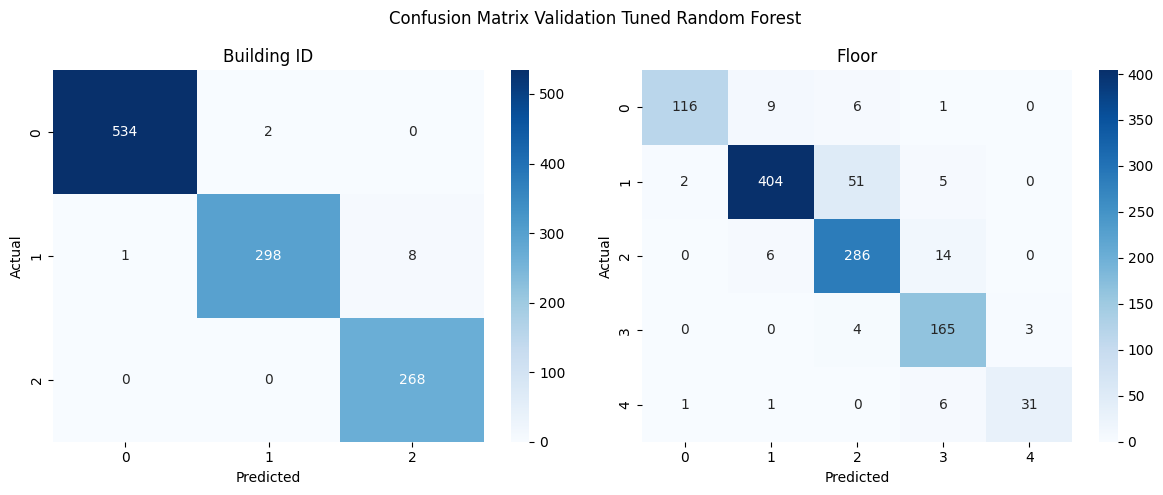

In [61]:
val_df = load_and_clean_dataset("./UJIndoorLoc/validationData.csv")
val_X = val_df[[col for col in val_df.columns if col.startswith("WAP")]]

print()
val_tuned_rf_yb_pred = rf_building.predict(val_X)
val_tuned_rf_yf_pred = rf_floor.predict(val_X)
evaluate_classification("Validation Tuned Random Forest", val_df['BUILDINGID'], val_tuned_rf_yb_pred, val_df['FLOOR'], val_tuned_rf_yf_pred)

## Advanced Model Regression

In [62]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df[RSSI_columns]
y_longitude = df["LONGITUDE"]
y_latitude = df["LATITUDE"]

# Spliting the training and testing dataset 
X_train, X_test, yn_train, yn_test = train_test_split(X, y_longitude, test_size=0.2, random_state=42)
X_train, X_test, yt_train, yt_test = train_test_split(X, y_latitude, test_size=0.2, random_state=42) 

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_regression(modelName, yn_test, yn_pred, yt_test, yt_pred):

    combined_data = [ (yn_test, yn_pred, "Longitude"), (yt_test, yt_pred, "Latitude")]
        
    # Regression Report
    for y_true, y_pred, title in combined_data:
        print(f"\n============== {modelName} {title} ==============")
        print(">> R2:".ljust(10), r2_score(y_true, y_pred))
        print(">> MSE:".ljust(10), mean_squared_error(y_true, y_pred))
        print(">> RMSE:".ljust(10), np.sqrt(mean_squared_error(y_true, y_pred)))
        print(">> MAE:".ljust(10), mean_absolute_error(y_true, y_pred))
        
    # Actual vs Predicted Scatter Plot
    plt.figure(figsize=(12, 5))
    for i, (y_true, y_pred, title) in enumerate(combined_data):
        plt.subplot(1, 2, i+1)
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
        plt.title(title)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.grid(True)
    plt.suptitle(f"Actual vs Predicted {modelName}")
    plt.tight_layout()
    plt.show()
    

In [64]:
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_regressor(model, loader, loss_fn, optimizer, epochs, device, target_name="", printing=True):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            preds = model(X_batch).squeeze()
            loss = loss_fn(preds, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if printing: 
            print(f"[{target_name}] Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")

In [93]:
from torch.utils.data import DataLoader, TensorDataset

def prepare_data_loaders(X_train, X_test, yn_train, yn_test, yt_train, yt_test, batch_size=64, cnn=False):
    data_loaders = {}

    for target, y_train, y_test in [('LONGITUDE', yn_train, yn_test), ('LATITUDE', yt_train, yt_test)]:
        train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32), 
                                 torch.tensor(y_train.values, dtype=torch.float32))
        test_ds = TensorDataset(torch.tensor(X_test, dtype=torch.float32), 
                                torch.tensor(y_test.values, dtype=torch.float32))
        data_loaders[target] = {
            'train': DataLoader(train_ds, batch_size=batch_size, shuffle=True),
            'test': DataLoader(test_ds, batch_size=batch_size, shuffle=False)
        }

    return data_loaders

In [66]:
def get_predictions(model, loader, device):
    model.eval()
    preds = []
    with torch.no_grad():
        for X_batch, _ in loader:
            X_batch = X_batch.to(device)
            output = model(X_batch).squeeze()
            preds.extend(output.cpu().numpy())
    return np.array(preds)

### Neural Network MLP

[LONGITUDE] Epoch 1/100 - Loss: 61.4692
[LONGITUDE] Epoch 2/100 - Loss: 11.8560
[LONGITUDE] Epoch 3/100 - Loss: 6.4894
[LONGITUDE] Epoch 4/100 - Loss: 4.3811
[LONGITUDE] Epoch 5/100 - Loss: 3.3782
[LONGITUDE] Epoch 6/100 - Loss: 2.7191
[LONGITUDE] Epoch 7/100 - Loss: 2.3374
[LONGITUDE] Epoch 8/100 - Loss: 2.0344
[LONGITUDE] Epoch 9/100 - Loss: 1.8726
[LONGITUDE] Epoch 10/100 - Loss: 1.7834
[LONGITUDE] Epoch 11/100 - Loss: 1.6966
[LONGITUDE] Epoch 12/100 - Loss: 1.6118
[LONGITUDE] Epoch 13/100 - Loss: 1.5515
[LONGITUDE] Epoch 14/100 - Loss: 1.5017
[LONGITUDE] Epoch 15/100 - Loss: 1.5562
[LONGITUDE] Epoch 16/100 - Loss: 1.3682
[LONGITUDE] Epoch 17/100 - Loss: 1.3666
[LONGITUDE] Epoch 18/100 - Loss: 1.3446
[LONGITUDE] Epoch 19/100 - Loss: 1.3616
[LONGITUDE] Epoch 20/100 - Loss: 1.2843
[LONGITUDE] Epoch 21/100 - Loss: 1.2886
[LONGITUDE] Epoch 22/100 - Loss: 1.1392
[LONGITUDE] Epoch 23/100 - Loss: 1.1637
[LONGITUDE] Epoch 24/100 - Loss: 1.2211
[LONGITUDE] Epoch 25/100 - Loss: 1.2059
[LONGIT

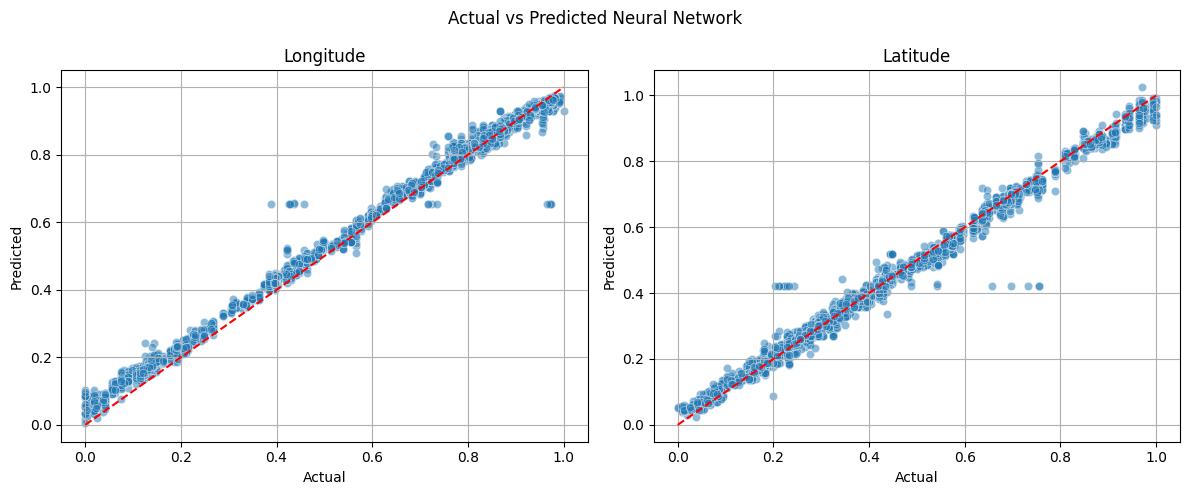

In [67]:
class WiFiNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super(WiFiNNRegressor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size // 2),
            nn.Dropout(0.2),
            nn.Linear(hidden_size // 2, 1) 
        )

    def forward(self, x):
        return self.network(x)

data_loaders = prepare_data_loaders(X_train.values, X_test.values, yn_train, yn_test, yt_train, yt_test)

predictions = {}
nn_models = {}
for target in ['LONGITUDE', 'LATITUDE']:
    nn_models[target] = WiFiNNRegressor(input_size=X.shape[1])
    optimizer = torch.optim.Adam(nn_models[target].parameters(), lr=0.001)
    train_regressor(nn_models[target], data_loaders[target]['train'], nn.MSELoss(), optimizer, epochs=100, device=device, target_name=target)
    predictions[target] = get_predictions(nn_models[target], data_loaders[target]['test'], device)
    print()

evaluate_regression("Neural Network", yn_test, predictions['LONGITUDE'], yt_test, predictions['LATITUDE'])


### CNN

[LONGITUDE] Epoch 1/100 - Loss: 14.2247
[LONGITUDE] Epoch 2/100 - Loss: 2.8796
[LONGITUDE] Epoch 3/100 - Loss: 2.3142
[LONGITUDE] Epoch 4/100 - Loss: 2.0046
[LONGITUDE] Epoch 5/100 - Loss: 1.7934
[LONGITUDE] Epoch 6/100 - Loss: 1.6068
[LONGITUDE] Epoch 7/100 - Loss: 1.4733
[LONGITUDE] Epoch 8/100 - Loss: 1.3849
[LONGITUDE] Epoch 9/100 - Loss: 1.3315
[LONGITUDE] Epoch 10/100 - Loss: 1.2854
[LONGITUDE] Epoch 11/100 - Loss: 1.2855
[LONGITUDE] Epoch 12/100 - Loss: 1.2495
[LONGITUDE] Epoch 13/100 - Loss: 1.2473
[LONGITUDE] Epoch 14/100 - Loss: 1.2519
[LONGITUDE] Epoch 15/100 - Loss: 1.2007
[LONGITUDE] Epoch 16/100 - Loss: 1.1875
[LONGITUDE] Epoch 17/100 - Loss: 1.2047
[LONGITUDE] Epoch 18/100 - Loss: 1.2111
[LONGITUDE] Epoch 19/100 - Loss: 1.2280
[LONGITUDE] Epoch 20/100 - Loss: 1.1815
[LONGITUDE] Epoch 21/100 - Loss: 1.1442
[LONGITUDE] Epoch 22/100 - Loss: 1.0998
[LONGITUDE] Epoch 23/100 - Loss: 1.1235
[LONGITUDE] Epoch 24/100 - Loss: 1.0912
[LONGITUDE] Epoch 25/100 - Loss: 1.0911
[LONGITU

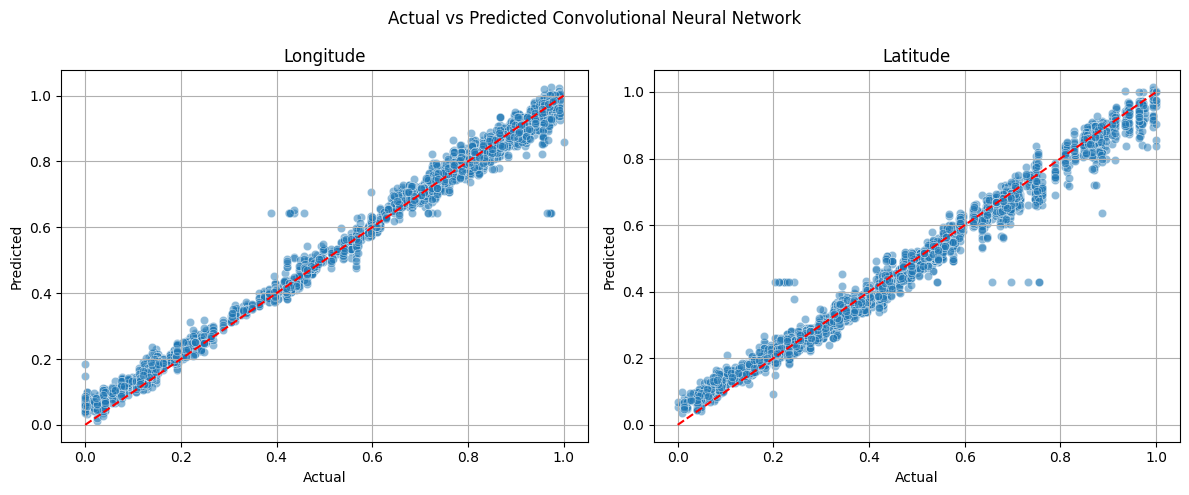

In [68]:
class WiFiCNNRegressor(nn.Module):
    def __init__(self):
        super(WiFiCNNRegressor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # (B,1,15,31) -> (B,16,15,31)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # (B,16,7,15)
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),                # (B,32,3,7)
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(32 * 3 * 7, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(self.flatten(self.cnn(x)))

X_train_cnn = X_train.values.reshape(-1, 1, 15, 31)  # 15x31 = 465 WAPs
X_test_cnn = X_test.values.reshape(-1, 1, 15, 31)

data_loaders = prepare_data_loaders(X_train_cnn, X_test_cnn, yn_train, yn_test, yt_train, yt_test)

cnn_models = {}
predictions = {}
for target in ['LONGITUDE', 'LATITUDE']:
    cnn_models[target] = WiFiCNNRegressor()
    optimizer = torch.optim.Adam(cnn_models[target].parameters(), lr=0.001)
    train_regressor(cnn_models[target], data_loaders[target]['train'], nn.MSELoss(), optimizer, epochs=100, device=device, target_name=target)
    predictions[target] = get_predictions(cnn_models[target], data_loaders[target]['test'], device)
    print()

evaluate_regression("Convolutional Neural Network", yn_test, predictions['LONGITUDE'], yt_test, predictions['LATITUDE'])

In [69]:
# Joy: ====================================================================================
# My MLP Nueral network performed better than my attempt at CNN. Lets do the same with the 
# basic classification and apply CV
# =========================================================================================

### Applying K-fold Cross validation

In [70]:
# def cross_validate_pytorch(model_class, X, y, epochs=30, batch_size=64, cnn=False):
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)
#     metrics = ?
    
#     for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
#         data_loaders = prepare_data_loaders(val_X_train.values, val_X_test.values, val_yn_train, val_yn_test, val_yt_train, val_yt_test)

#         models = {}
#         predictions = {}
#         for target in ['LONGITUDE', 'LATITUDE']:
#             models[target] = WiFiNNRegressor(input_size=val_X.shape[1])
#             optimizer = torch.optim.Adam(models[target].parameters(), lr=0.001)
#             train_regressor(models[target], data_loaders[target]['train'], nn.MSELoss(), optimizer, epochs=30, device=device, target_name=target)
#             predictions[target] = get_predictions(models[target], data_loaders[target]['test'], device)
#             r2 = r2_score(data_loaders[target]['test'], predictions[target])
#             mse = mean_squared_error(data_loaders[target]['test'], predictions[target])
#             rmse = np.sqrt(mse)
#             mae = mean_absolute_error(data_loaders[target]['test'], predictions[target])
            
#             metrics[fold]['r2'].append(r2)
#             metrics[fold]['mse'].append(mse)
#             metrics[fold]['rmse'].append(rmse)
#             metrics[fold]['mae'].append(mae)
#   print(f"Fold {fold + 1} r2={r2}, mse={mse}, rmse={rmse}, mae={mae} \n")

#     avg_metrics = {metric: np.mean(scores) for metric, scores in metrics.items()}
#     print("\nAverage Cross-validation Metrics:")
#     for metric, score in avg_metrics.items():
#         print(f"{metric.upper()}: {score:.4f}")


In [71]:
# Assume previously defined clearly:
# - WiFiNNRegressor / WiFiCNNRegressor
# - train_regressor()
# - evaluate_regressor()

from sklearn.model_selection import KFold
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def cross_validate_pytorch(model_class, X, y, epochs=100, batch_size=64, cnn=False):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    metrics = {'r2': [], 'mse': [], 'rmse': [], 'mae': []}

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if cnn:
            X_train = X_train.reshape(-1, 1, 15, 31)
            X_test = X_test.reshape(-1, 1, 15, 31)

        train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32), 
                                 torch.tensor(y_train, dtype=torch.float32))
        test_ds = TensorDataset(torch.tensor(X_test, dtype=torch.float32), 
                                torch.tensor(y_test, dtype=torch.float32))

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

        model = model_class().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        loss_fn = nn.MSELoss()

        train_regressor(model, train_loader, loss_fn, optimizer, epochs, device)

        y_pred = get_predictions(model, test_loader, device)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        
        metrics['r2'].append(r2)
        metrics['mse'].append(mse)
        metrics['rmse'].append(rmse)
        metrics['mae'].append(mae)

        print(f"Fold {fold + 1} r2={r2}, mse={mse}, rmse={rmse}, mae={mae} \n")

    avg_metrics = {metric: np.mean(scores) for metric, scores in metrics.items()}
    print("\nAverage Cross-validation Metrics:")
    for metric, score in avg_metrics.items():
        print(f"{metric.upper()}: {score:.4f}")


In [72]:
print("=== NN Longitude ===")
cross_validate_pytorch(
    model_class=lambda: WiFiNNRegressor(input_size=X.shape[1]),
    X=X.values,
    y=y_longitude.values,
)

=== NN Longitude ===
[] Epoch 1/100 - Loss: 57.8155
[] Epoch 2/100 - Loss: 11.2958
[] Epoch 3/100 - Loss: 6.0574
[] Epoch 4/100 - Loss: 4.1654
[] Epoch 5/100 - Loss: 3.1918
[] Epoch 6/100 - Loss: 2.6357
[] Epoch 7/100 - Loss: 2.2526
[] Epoch 8/100 - Loss: 2.1036
[] Epoch 9/100 - Loss: 1.8905
[] Epoch 10/100 - Loss: 1.8517
[] Epoch 11/100 - Loss: 1.6848
[] Epoch 12/100 - Loss: 1.6063
[] Epoch 13/100 - Loss: 1.6096
[] Epoch 14/100 - Loss: 1.5179
[] Epoch 15/100 - Loss: 1.5717
[] Epoch 16/100 - Loss: 1.4414
[] Epoch 17/100 - Loss: 1.4848
[] Epoch 18/100 - Loss: 1.3542
[] Epoch 19/100 - Loss: 1.3605
[] Epoch 20/100 - Loss: 1.3403
[] Epoch 21/100 - Loss: 1.2483
[] Epoch 22/100 - Loss: 1.3455
[] Epoch 23/100 - Loss: 1.2466
[] Epoch 24/100 - Loss: 1.1669
[] Epoch 25/100 - Loss: 1.2336
[] Epoch 26/100 - Loss: 1.1992
[] Epoch 27/100 - Loss: 1.0992
[] Epoch 28/100 - Loss: 1.1153
[] Epoch 29/100 - Loss: 1.1121
[] Epoch 30/100 - Loss: 1.0786
[] Epoch 31/100 - Loss: 1.1107
[] Epoch 32/100 - Loss: 1

In [73]:
print("=== CNN Longitude ===")
cross_validate_pytorch(
    model_class=WiFiCNNRegressor,
    X=X.values,
    y=y_longitude.values,
    cnn=True
)

=== CNN Longitude ===
[] Epoch 1/100 - Loss: 12.3443
[] Epoch 2/100 - Loss: 3.0772
[] Epoch 3/100 - Loss: 2.6006
[] Epoch 4/100 - Loss: 2.2778
[] Epoch 5/100 - Loss: 2.0743
[] Epoch 6/100 - Loss: 2.0113
[] Epoch 7/100 - Loss: 1.9669
[] Epoch 8/100 - Loss: 1.9176
[] Epoch 9/100 - Loss: 1.9000
[] Epoch 10/100 - Loss: 1.8659
[] Epoch 11/100 - Loss: 1.8849
[] Epoch 12/100 - Loss: 1.8050
[] Epoch 13/100 - Loss: 1.6936
[] Epoch 14/100 - Loss: 1.6812
[] Epoch 15/100 - Loss: 1.7442
[] Epoch 16/100 - Loss: 1.7024
[] Epoch 17/100 - Loss: 1.6777
[] Epoch 18/100 - Loss: 1.6983
[] Epoch 19/100 - Loss: 1.6902
[] Epoch 20/100 - Loss: 1.6796
[] Epoch 21/100 - Loss: 1.6716
[] Epoch 22/100 - Loss: 1.5915
[] Epoch 23/100 - Loss: 1.4746
[] Epoch 24/100 - Loss: 1.4638
[] Epoch 25/100 - Loss: 1.4326
[] Epoch 26/100 - Loss: 1.4491
[] Epoch 27/100 - Loss: 1.4664
[] Epoch 28/100 - Loss: 1.4302
[] Epoch 29/100 - Loss: 1.4352
[] Epoch 30/100 - Loss: 1.4566
[] Epoch 31/100 - Loss: 1.4193
[] Epoch 32/100 - Loss: 1

In [74]:
# Joy: ====================================================================================
# Similar to the simple classification the single train-test split seems to be 
# representative of the whoke trainingData.csv Let's now simulate the real world with a 
# completely new dataset validationData.csv
# =========================================================================================

### Simulating real-life deployment with validationData.csv

Loading ./UJIndoorLoc/validationData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler
[LONGITUDE] Epoch 1/30 - Loss: 6.6394
[LONGITUDE] Epoch 2/30 - Loss: 3.7291
[LONGITUDE] Epoch 3/30 - Loss: 2.7182
[LONGITUDE] Epoch 4/30 - Loss: 2.0272
[LONGITUDE] Epoch 5/30 - Loss: 1.6096
[LONGITUDE] Epoch 6/30 - Loss: 1.2741
[LONGITUDE] Epoch 7/30 - Loss: 1.1879
[LONGITUDE] Epoch 8/30 - Loss: 1.0362
[LONGITUDE] Epoch 9/30 - Loss: 0.9922
[LONGITUDE] Epoch 10/30 - Loss: 0.8733
[LONGITUDE] Epoch 11/30 - Loss: 0.7354
[LONGITUDE] Epoch 12/30 - Loss: 0.6903
[LONGITUDE] Epoch 13/30 - Loss: 0.6414
[LONGITUDE] Epoch 14/30 - Loss: 0.5693
[LONGITUDE] Epoch 15/30 - Loss: 0.4995
[LONGITUDE] Epoch 16/30 - Loss: 0.5579
[LONGITUDE] Epoch 17/30 - Loss: 0.4598
[LONGITUDE] Epoc

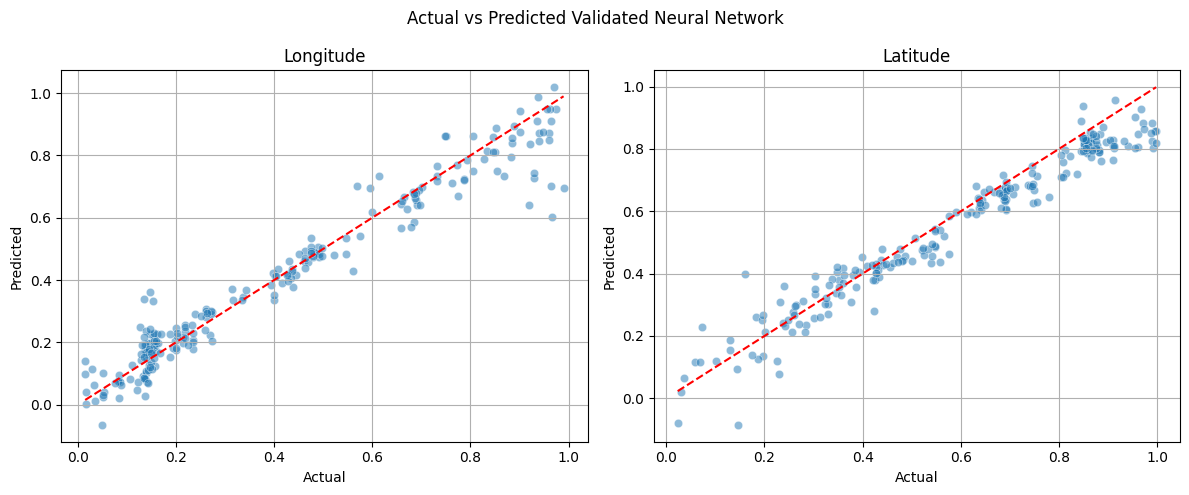

[LONGITUDE] Epoch 1/30 - Loss: 1.6282
[LONGITUDE] Epoch 2/30 - Loss: 1.1600
[LONGITUDE] Epoch 3/30 - Loss: 0.8564
[LONGITUDE] Epoch 4/30 - Loss: 0.5140
[LONGITUDE] Epoch 5/30 - Loss: 0.3318
[LONGITUDE] Epoch 6/30 - Loss: 0.2549
[LONGITUDE] Epoch 7/30 - Loss: 0.1899
[LONGITUDE] Epoch 8/30 - Loss: 0.1649
[LONGITUDE] Epoch 9/30 - Loss: 0.1549
[LONGITUDE] Epoch 10/30 - Loss: 0.1427
[LONGITUDE] Epoch 11/30 - Loss: 0.1240
[LONGITUDE] Epoch 12/30 - Loss: 0.1219
[LONGITUDE] Epoch 13/30 - Loss: 0.1072
[LONGITUDE] Epoch 14/30 - Loss: 0.0988
[LONGITUDE] Epoch 15/30 - Loss: 0.1064
[LONGITUDE] Epoch 16/30 - Loss: 0.1073
[LONGITUDE] Epoch 17/30 - Loss: 0.0988
[LONGITUDE] Epoch 18/30 - Loss: 0.0880
[LONGITUDE] Epoch 19/30 - Loss: 0.0886
[LONGITUDE] Epoch 20/30 - Loss: 0.0815
[LONGITUDE] Epoch 21/30 - Loss: 0.0772
[LONGITUDE] Epoch 22/30 - Loss: 0.0784
[LONGITUDE] Epoch 23/30 - Loss: 0.0796
[LONGITUDE] Epoch 24/30 - Loss: 0.0703
[LONGITUDE] Epoch 25/30 - Loss: 0.0797
[LONGITUDE] Epoch 26/30 - Loss: 0.

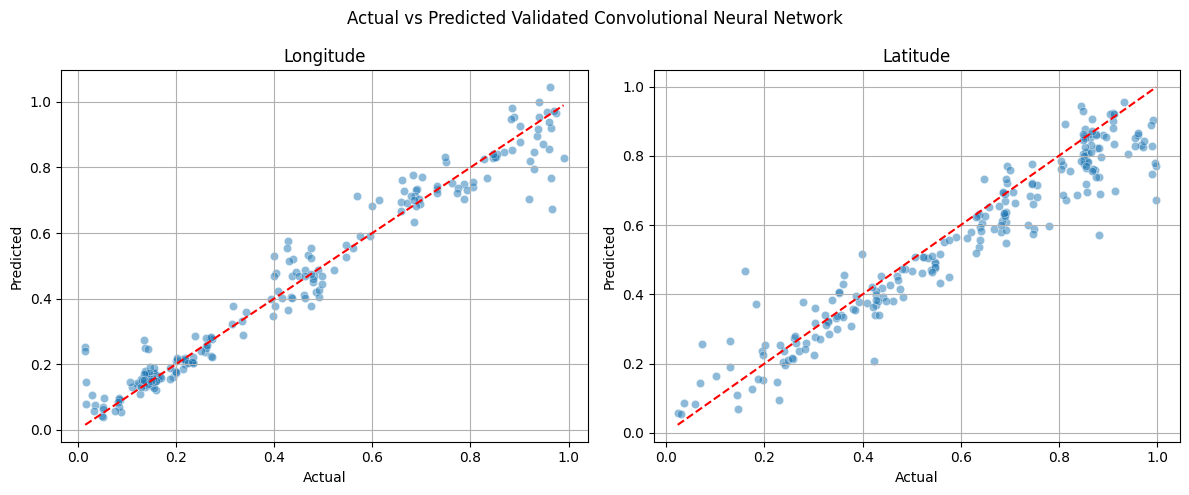

In [75]:
val_df = load_and_clean_dataset("./UJIndoorLoc/validationData.csv")
val_X = val_df[[col for col in val_df.columns if col.startswith("WAP")]]

val_y_longitude = val_df["LONGITUDE"]
val_y_latitude = val_df["LATITUDE"]

val_X_train, val_X_test, val_yn_train, val_yn_test = train_test_split(val_X, val_y_longitude, test_size=0.2, random_state=42)
val_X_train, val_X_test, val_yt_train, val_yt_test = train_test_split(val_X, val_y_latitude, test_size=0.2, random_state=42) 

# NN
data_loaders = prepare_data_loaders(val_X_train.values, val_X_test.values, val_yn_train, val_yn_test, val_yt_train, val_yt_test)

nn_models = {}
nn_predictions = {}
for target in ['LONGITUDE', 'LATITUDE']:
    nn_models[target] = WiFiNNRegressor(input_size=val_X.shape[1])
    optimizer = torch.optim.Adam(nn_models[target].parameters(), lr=0.001)
    train_regressor(nn_models[target], data_loaders[target]['train'], nn.MSELoss(), optimizer, epochs=30, device=device, target_name=target)
    nn_predictions[target] = get_predictions(nn_models[target], data_loaders[target]['test'], device)
    print()

evaluate_regression("Validated Neural Network", val_yn_test, nn_predictions['LONGITUDE'], val_yt_test, nn_predictions['LATITUDE'])

# CNN
X_train_cnn = val_X_train.values.reshape(-1, 1, 15, 31)
X_test_cnn = val_X_test.values.reshape(-1, 1, 15, 31)

data_loaders = prepare_data_loaders(X_train_cnn, X_test_cnn, val_yn_train, val_yn_test, val_yt_train, val_yt_test)

cnn_models = {}
cnn_predictions = {}
for target in ['LONGITUDE', 'LATITUDE']:
    cnn_models[target] = WiFiCNNRegressor()
    optimizer = torch.optim.Adam(cnn_models[target].parameters(), lr=0.001)
    train_regressor(cnn_models[target], data_loaders[target]['train'], nn.MSELoss(), optimizer, epochs=30, device=device, target_name=target)
    cnn_predictions[target] = get_predictions(cnn_models[target], data_loaders[target]['test'], device)
    print()

evaluate_regression("Validated Convolutional Neural Network", val_yn_test, cnn_predictions['LONGITUDE'], val_yt_test, cnn_predictions['LATITUDE'])

In [76]:
# Joy: ====================================================================================
# Since we learned Differential Evolution in another class, I know it is good for 
# hyperparamter tuning so I'll attempt to implement it here with CV because overfitting is 
# a great risk when applying hyperparameter tuning. I needed the help of GPT to use the 
# differential_evolution function from scipy.optimize
# =========================================================================================

### Hyperparameter tuning on Neural Network

In [95]:
from scipy.optimize import differential_evolution
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

def create_objective(X_train, X_test, yn_train, yn_test, yt_train, yt_test, target_name):
    loaders = prepare_data_loaders(X_train, X_test, yn_train, yn_test, yt_train, yt_test)
    
    def objective(params):
        hidden_size = int(params[0])
        dropout = float(params[1])
        lr = float(params[2])

        class TunedNN(nn.Module):
            def __init__(self, input_size):
                super().__init__()
                self.network = nn.Sequential(
                    nn.Linear(input_size, hidden_size),
                    nn.ReLU(),
                    nn.BatchNorm1d(hidden_size),
                    nn.Linear(hidden_size, hidden_size // 2),
                    nn.ReLU(),
                    nn.BatchNorm1d(hidden_size // 2),
                    nn.Dropout(dropout),
                    nn.Linear(hidden_size // 2, 1)
                )
            def forward(self, x):
                return self.network(x)

        model = TunedNN(input_size=X_train.shape[1]).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.MSELoss()

        train_regressor(
            model,
            loaders[target_name]['train'],
            loss_fn,
            optimizer,
            epochs=15,
            device=device,
            target_name=target_name,
            printing=False  # You added this arg — nice touch
        )

        preds = get_predictions(model, loaders[target_name]['test'], device)
        y_true = (yn_test if target_name == 'LONGITUDE' else yt_test).values

        mse = mean_squared_error(y_true, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, preds)
        r2 = r2_score(y_true, preds)

        print(f">> [{target_name}] h={hidden_size} d={dropout:.3f} lr={lr:.5f} | r2={r2:.4f} rmse={rmse:.4f} mae={mae:.4f}")
        return rmse

    return objective

In [ ]:
bounds = [
    (32, 128),     # hidden size
    (0.1, 0.5),    # dropout
    (1e-4, 1e-2)   # learning rate
]

print("Tuning LONGITUDE")
long_result = differential_evolution(
    create_objective(X_train.values, X_test.values, yn_train, yn_test, yt_train, yt_test, target_name="LONGITUDE"),
    bounds,
    strategy='best1bin',
    maxiter=10,
    popsize=4,
    seed=42
)

print("Tuning LATITUDE")
lat_result = differential_evolution(
    create_objective(X_train.values, X_test.values, yn_train, yn_test, yt_train, yt_test, target_name="LATITUDE"),
    bounds,
    strategy='best1bin',
    maxiter=10,
    popsize=4,
    seed=42
)

# Print summary
print("\n Best Config for LONGITUDE:")
print(f">> Hidden Size: {int(long_result.x[0])}")
print(f">> Dropout: {long_result.x[1]}")
print(f">> Learning Rate: {long_result.x[2]}")
print(f">> Validation RMSE: {long_result.fun}")

print("\n Best Config for LATITUDE:")
print(f">> Hidden Size: {int(lat_result.x[0])}")
print(f">> Dropout: {lat_result.x[1]}")
print(f">> Learning Rate: {lat_result.x[2]}")
print(f">> Validation RMSE: {lat_result.fun}")

Tuning LONGITUDE
>> h=127 d=0.20 lr=0.00355 | r2=0.9680903702715095, mse=0.003253917281939739, rmse=0.057043117743858805, mae=0.04908451407802643
>> h=116 d=0.50 lr=0.00225 | r2=0.9876969620131419, mse=0.001254576385449401, rmse=0.03541999979459911, mae=0.024740893798116406
>> h=48 d=0.24 lr=0.00840 | r2=0.9869621538490723, mse=0.0013295069002915124, rmse=0.03646240392913655, mae=0.02912508853329434
>> h=34 d=0.39 lr=0.00070 | r2=0.973671421251894, mse=0.0026848013632976135, rmse=0.051815068882494146, mae=0.039903262405055914
>> h=73 d=0.31 lr=0.00686 | r2=0.9918313491144735, mse=0.0008329809688394878, rmse=0.028861409682125503, mae=0.019709350509922827
>> h=83 d=0.28 lr=0.00618 | r2=0.991962328811665, mse=0.000819624590094217, rmse=0.02862908643485183, mae=0.01999679385136939
>> h=89 d=0.42 lr=0.00555 | r2=0.9849102157358001, mse=0.001538748967500018, rmse=0.03922689087220676, mae=0.03019596459408754
>> h=61 d=0.44 lr=0.00466 | r2=0.9918463136140311, mse=0.0008314549955160516, rmse=0.

In [ ]:
# Custom models from DE best config
class TunedNNLongitude(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 83),
            nn.ReLU(),
            nn.BatchNorm1d(83),
            nn.Dropout(0.136),
            nn.Linear(83, 83 // 2),
            nn.ReLU(),
            nn.BatchNorm1d(83 // 2),
            nn.Dropout(0.136),
            nn.Linear(83 // 2, 1)
        )
    def forward(self, x):
        return self.network(x)

class TunedNNLatitude(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 115),
            nn.ReLU(),
            nn.BatchNorm1d(115),
            nn.Dropout(0.157),
            nn.Linear(115, 115 // 2),
            nn.ReLU(),
            nn.BatchNorm1d(115 // 2),
            nn.Dropout(0.157),
            nn.Linear(115 // 2, 1)
        )
    def forward(self, x):
        return self.network(x)

Loading ./UJIndoorLoc/validationData.csv and applying the same preprocessing
>> The values in WAPxxx columns with 100 is turned into -105
>> Dropped 55 WAP columns that were never detected.
>> Checking if there are any missing values: False
>> Scaling the numerical columns (RSSI_columns and Coordinate Columns) with MinMaxScaler
[LONGITUDE] Epoch 1/100 - Loss: 2.6231
[LONGITUDE] Epoch 2/100 - Loss: 0.3245
[LONGITUDE] Epoch 3/100 - Loss: 0.2034
[LONGITUDE] Epoch 4/100 - Loss: 0.1382
[LONGITUDE] Epoch 5/100 - Loss: 0.1247
[LONGITUDE] Epoch 6/100 - Loss: 0.0881
[LONGITUDE] Epoch 7/100 - Loss: 0.0806
[LONGITUDE] Epoch 8/100 - Loss: 0.1099
[LONGITUDE] Epoch 9/100 - Loss: 0.0977
[LONGITUDE] Epoch 10/100 - Loss: 0.0782
[LONGITUDE] Epoch 11/100 - Loss: 0.0931
[LONGITUDE] Epoch 12/100 - Loss: 0.0850
[LONGITUDE] Epoch 13/100 - Loss: 0.0763
[LONGITUDE] Epoch 14/100 - Loss: 0.0721
[LONGITUDE] Epoch 15/100 - Loss: 0.0756
[LONGITUDE] Epoch 16/100 - Loss: 0.0582
[LONGITUDE] Epoch 17/100 - Loss: 0.0835

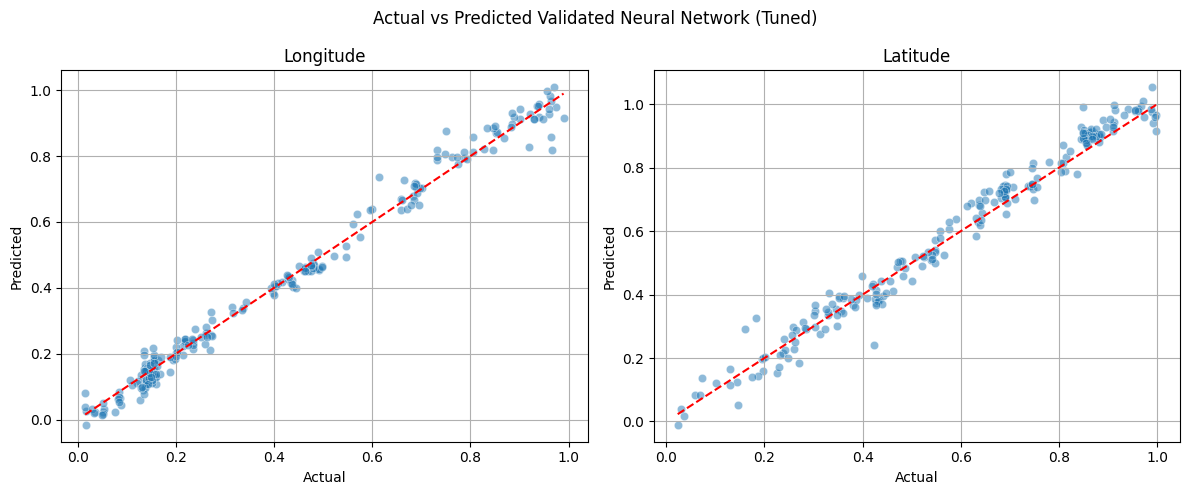

In [96]:
val_df = load_and_clean_dataset("./UJIndoorLoc/validationData.csv")
val_X = val_df[[col for col in val_df.columns if col.startswith("WAP")]]

val_y_longitude = val_df["LONGITUDE"]
val_y_latitude = val_df["LATITUDE"]

val_X_train, val_X_test, val_yn_train, val_yn_test = train_test_split(val_X, val_y_longitude, test_size=0.2, random_state=42)
val_X_train, val_X_test, val_yt_train, val_yt_test = train_test_split(val_X, val_y_latitude, test_size=0.2, random_state=42) 

# NN
data_loaders = prepare_data_loaders(val_X_train.values, val_X_test.values, val_yn_train, val_yn_test, val_yt_train, val_yt_test)

nn_models = {}
nn_predictions = {}

# LONGITUDE
nn_models['LONGITUDE'] = TunedNNLongitude(input_size=val_X.shape[1])
optimizer = torch.optim.Adam(nn_models['LONGITUDE'].parameters(), lr=0.00994)
train_regressor(nn_models['LONGITUDE'], data_loaders['LONGITUDE']['train'], nn.MSELoss(), optimizer, epochs=100, device=device, target_name='LONGITUDE')
nn_predictions['LONGITUDE'] = get_predictions(nn_models['LONGITUDE'], data_loaders['LONGITUDE']['test'], device)

# LATITUDE
nn_models['LATITUDE'] = TunedNNLatitude(input_size=val_X.shape[1])
optimizer = torch.optim.Adam(nn_models['LATITUDE'].parameters(), lr=0.00669)
train_regressor(nn_models['LATITUDE'], data_loaders['LATITUDE']['train'], nn.MSELoss(), optimizer, epochs=100, device=device, target_name='LATITUDE')
nn_predictions['LATITUDE'] = get_predictions(nn_models['LATITUDE'], data_loaders['LATITUDE']['test'], device)

evaluate_regression("Validated Neural Network (Tuned)", val_yn_test, nn_predictions['LONGITUDE'], val_yt_test, nn_predictions['LATITUDE'])

# Code not used

In [79]:
# Importing necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define target and features
X = df[RSSI_columns]  # Replace with your actual column names
y_longitude = df["LONGITUDE"]
y_latitude = df["LATITUDE"]

# Split the training and testing dataset
X_train, X_test, yn_train, yn_test = train_test_split(X, y_longitude, test_size=0.2, random_state=42)
_, _, yt_train, yt_test = train_test_split(X, y_latitude, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor for longitude prediction
model_longitude = RandomForestRegressor(n_estimators=100, random_state=42)
model_longitude.fit(X_train, yn_train)  # Train on longitude data

# Make predictions for longitude
y_pred_longitude = model_longitude.predict(X_test)

# Calculate R² for longitude
r2_longitude = r2_score(yn_test, y_pred_longitude)

# Calculate RMSE for longitude
rmse_longitude = np.sqrt(mean_squared_error(yn_test, y_pred_longitude))

# Calculate MAE for longitude
mae_longitude = mean_absolute_error(yn_test, y_pred_longitude)


# Initialize RandomForestRegressor for latitude prediction
model_latitude = RandomForestRegressor(n_estimators=100, random_state=42)
model_latitude.fit(X_train, yt_train)  # Train on latitude data

# Make predictions for latitude
y_pred_latitude = model_latitude.predict(X_test)

# Calculate R² for latitude
r2_latitude = r2_score(yt_test, y_pred_latitude)

# Calculate RMSE for latitude
rmse_latitude = np.sqrt(mean_squared_error(yt_test, y_pred_latitude))

# Calculate MAE for latitude
mae_latitude = mean_absolute_error(yt_test, y_pred_latitude)


# Print Results
print(f"Longitude Prediction Metrics:")
print(f"R²: {r2_longitude:.4f}")
print(f"RMSE: {rmse_longitude:.4f}")
print(f"MAE: {mae_longitude:.4f}")
print("\n")

print(f"Latitude Prediction Metrics:")
print(f"R²: {r2_latitude:.4f}")
print(f"RMSE: {rmse_latitude:.4f}")
print(f"MAE: {mae_latitude:.4f}")


Longitude Prediction Metrics:
R²: 0.9961
RMSE: 0.0200
MAE: 0.0075


Latitude Prediction Metrics:
R²: 0.9933
RMSE: 0.0203
MAE: 0.0086


### NN and CNN experimentation

In [80]:
# Joy: ====================================================================================
# Writing code for deep learning model is difficult so in this section I'm just trying to 
# make the code work. This section is very skippable but I'm keepign it here incase the 
# new formatted code doesn't work
# =========================================================================================

In [81]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # 1. Neural Network for Single Output
# class WiFiNNRegressor(nn.Module):
#     def __init__(self, input_size, hidden_size=64):
#         super(WiFiNNRegressor, self).__init__()
#         self.network = nn.Sequential(
#             nn.Linear(input_size, hidden_size),
#             nn.ReLU(),
#             nn.BatchNorm1d(hidden_size),
#             nn.Dropout(0.3),
#             nn.Linear(hidden_size, hidden_size // 2),
#             nn.ReLU(),
#             nn.BatchNorm1d(hidden_size // 2),
#             nn.Dropout(0.2),
#             nn.Linear(hidden_size // 2, 1)  # Single output
#         )

#     def forward(self, x):
#         return self.network(x)

# # 2. Evaluation function for single-output regression
# def evaluate_single_output(model, test_loader, device='cpu'):
#     model.eval()
#     all_preds = []
#     all_labels = []

#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch).squeeze()
#             all_preds.extend(outputs.cpu().numpy())
#             all_labels.extend(y_batch.cpu().numpy())

#     mse = mean_squared_error(all_labels, all_preds)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(all_labels, all_preds)
#     r2 = r2_score(all_labels, all_preds)

#     return mse, rmse, mae, r2

# # 3. Prepare Data (assuming it's already scaled)
# X = df[RSSI_columns].values
# y_long = df["LONGITUDE"].values
# y_lat = df["LATITUDE"].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_long_train, y_long_test = train_test_split(X, y_long, test_size=0.2, random_state=42)
# _, _, y_lat_train, y_lat_test = train_test_split(X, y_lat, test_size=0.2, random_state=42)  # to match splits

# # Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_long_train_tensor = torch.tensor(y_long_train, dtype=torch.float32)
# y_lat_train_tensor = torch.tensor(y_lat_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_long_test_tensor = torch.tensor(y_long_test, dtype=torch.float32)
# y_lat_test_tensor = torch.tensor(y_lat_test, dtype=torch.float32)

# # Create DataLoaders
# long_train_loader = DataLoader(TensorDataset(X_train_tensor, y_long_train_tensor), batch_size=64, shuffle=True)
# long_test_loader = DataLoader(TensorDataset(X_test_tensor, y_long_test_tensor), batch_size=64, shuffle=False)
# lat_train_loader = DataLoader(TensorDataset(X_train_tensor, y_lat_train_tensor), batch_size=64, shuffle=True)
# lat_test_loader = DataLoader(TensorDataset(X_test_tensor, y_lat_test_tensor), batch_size=64, shuffle=False)

# # 4. Train Models
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model_long = WiFiNNRegressor(input_size=X.shape[1]).to(device)
# model_lat = WiFiNNRegressor(input_size=X.shape[1]).to(device)

# loss_fn = nn.MSELoss()
# optimizer_long = torch.optim.Adam(model_long.parameters(), lr=0.001)
# optimizer_lat = torch.optim.Adam(model_lat.parameters(), lr=0.001)

# epochs = 100
# print("Training CNN model for LONGITUDE...")
# for epoch in range(epochs):
#     model_long.train()
#     epoch_loss = 0
#     for X_batch, y_batch in long_train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer_long.zero_grad()
#         preds = model_long(X_batch).squeeze()
#         loss = loss_fn(preds, y_batch)
#         loss.backward()
#         optimizer_long.step()
#         epoch_loss += loss.item()
#     print(f">> Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")

# print("\nTraining CNN model for LATITUDE...")
# for epoch in range(epochs):
#     model_lat.train()
#     epoch_loss = 0
#     for X_batch, y_batch in lat_train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         optimizer_lat.zero_grad()
#         preds = model_lat(X_batch).squeeze()
#         loss = loss_fn(preds, y_batch)
#         loss.backward()
#         optimizer_lat.step()
#         epoch_loss += loss.item()
#     print(f">> Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")

# # 5. Evaluate Both Models
# def get_predictions(model, data_loader, device='cpu'):
#     model.eval()
#     preds = []

#     with torch.no_grad():
#         for X_batch, _ in data_loader:
#             X_batch = X_batch.to(device)
#             output = model(X_batch).squeeze()
#             preds.extend(output.cpu().numpy())

#     return np.array(preds)

# model_long_preds = get_predictions(model_long, long_test_loader, device)
# model_lat_preds = get_predictions(model_lat, lat_test_loader, device)
# evaluate_regression("Neural Network", y_long_test, model_long_preds, y_lat_test, model_lat_preds)

In [82]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # ==== CNN Regressor ====
# class WiFiCNNRegressor(nn.Module):
#     def __init__(self):
#         super(WiFiCNNRegressor, self).__init__()
#         self.cnn = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=3, padding=1),  # (B,1,15,31) -> (B,16,15,31)
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),                # (B,16,7,15)
#             nn.Conv2d(16, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2),                # (B,32,3,7)
#         )
#         self.flatten = nn.Flatten()
#         self.fc = nn.Sequential(
#             nn.Linear(32 * 3 * 7, 64),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(64, 1)
#         )

#     def forward(self, x):
#         return self.fc(self.flatten(self.cnn(x)))

# # ==== Helper Functions ====
# def reshape_for_cnn(X):
#     return X.reshape(-1, 1, 15, 31)  # 15x31 = 465 WAPs

# def get_predictions(model, loader, device='cpu'):
#     model.eval()
#     preds = []
#     with torch.no_grad():
#         for X_batch, _ in loader:
#             X_batch = X_batch.to(device)
#             output = model(X_batch).squeeze()
#             preds.extend(output.cpu().numpy())
#     return np.array(preds)

# # ==== Data Preparation ====
# X = df[RSSI_columns].values  # RSSI_columns must contain 465 WAPs
# assert X.shape[1] == 465, f"Expected 465 RSSI features, got {X.shape[1]}"
# y_long = df["LONGITUDE"].values
# y_lat = df["LATITUDE"].values

# X_train, X_test, y_long_train, y_long_test = train_test_split(X, y_long, test_size=0.2, random_state=42)
# _, _, y_lat_train, y_lat_test = train_test_split(X, y_lat, test_size=0.2, random_state=42)

# X_train_cnn = reshape_for_cnn(X_train)
# X_test_cnn = reshape_for_cnn(X_test)

# X_train_tensor = torch.tensor(X_train_cnn, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
# y_long_train_tensor = torch.tensor(y_long_train, dtype=torch.float32)
# y_long_test_tensor = torch.tensor(y_long_test, dtype=torch.float32)
# y_lat_train_tensor = torch.tensor(y_lat_train, dtype=torch.float32)
# y_lat_test_tensor = torch.tensor(y_lat_test, dtype=torch.float32)

# long_train_loader = DataLoader(TensorDataset(X_train_tensor, y_long_train_tensor), batch_size=64, shuffle=True)
# lat_train_loader = DataLoader(TensorDataset(X_train_tensor, y_lat_train_tensor), batch_size=64, shuffle=True)
# long_test_loader = DataLoader(TensorDataset(X_test_tensor, y_long_test_tensor), batch_size=64, shuffle=False)
# lat_test_loader = DataLoader(TensorDataset(X_test_tensor, y_lat_test_tensor), batch_size=64, shuffle=False)

# # ==== Train Models ====
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_long = WiFiCNNRegressor().to(device)
# model_lat = WiFiCNNRegressor().to(device)
# loss_fn = nn.MSELoss()
# opt_long = torch.optim.Adam(model_long.parameters(), lr=0.001)
# opt_lat = torch.optim.Adam(model_lat.parameters(), lr=0.001)

# epochs = 100
# print("Training CNN model for LONGITUDE...")
# for epoch in range(epochs):
#     model_long.train()
#     total_loss = 0
#     for X_batch, y_batch in long_train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         opt_long.zero_grad()
#         preds = model_long(X_batch).squeeze()
#         loss = loss_fn(preds, y_batch)
#         loss.backward()
#         opt_long.step()
#         total_loss += loss.item()
#     print(f">> Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")

# print("\nTraining CNN model for LATITUDE...")
# for epoch in range(epochs):
#     model_lat.train()
#     total_loss = 0
#     for X_batch, y_batch in lat_train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         opt_lat.zero_grad()
#         preds = model_lat(X_batch).squeeze()
#         loss = loss_fn(preds, y_batch)
#         loss.backward()
#         opt_lat.step()
#         total_loss += loss.item()
#     print(f">> Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")

# # ==== Predict & Evaluate ====
# model_long_preds = get_predictions(model_long, long_test_loader, device)
# model_lat_preds = get_predictions(model_lat, lat_test_loader, device)
# evaluate_regression("CNN Regressor", y_long_test, model_long_preds, y_lat_test, model_lat_preds)